In [1]:
import pandas as pd
import numpy as np
import scipy.io as scio
import matplotlib.pyplot as plt

In [2]:
df1_1 = pd.read_csv('kcf_9_floor1.csv')
df1_1 = df1_1.drop(df1_1.columns[[0]], axis = 1).reset_index(drop=True)
df1_2 = pd.read_csv('kcf_9_floor2.csv')
df1_2 = df1_2.drop(df1_2.columns[[0]], axis = 1).reset_index(drop=True)
df1_3 = pd.read_csv('kcf_9_floor3.csv')
df1_3 = df1_3.drop(df1_3.columns[[0]], axis = 1).reset_index(drop=True)
df2_1 = pd.read_csv('klt_9_floor1.csv')
df2_1 = df2_1.drop(df2_1.columns[[0]], axis = 1).reset_index(drop=True)
df2_2 = pd.read_csv('klt_9_floor2.csv')
df2_2 = df2_2.drop(df2_2.columns[[0]], axis = 1).reset_index(drop=True)
df2_3 = pd.read_csv('klt_9_floor3.csv')
df2_3 = df2_3.drop(df2_3.columns[[0]], axis = 1).reset_index(drop=True)
df3_1 = pd.read_csv('mf_9_floor1.csv')
df3_1 = df3_1.drop(df3_1.columns[[0]], axis = 1).reset_index(drop=True)
df3_2 = pd.read_csv('mf_9_floor2.csv')
df3_2 = df3_2.drop(df3_2.columns[[0]], axis = 1).reset_index(drop=True)
df3_3 = pd.read_csv('mf_9_floor3.csv')
df3_3 = df3_3.drop(df3_3.columns[[0]], axis = 1).reset_index(drop=True)

In [3]:
def loss(target, prediction):
    if np.isnan(target).all() or np.isnan(prediction).all():
        return 0, 0, 0, 0
    from math import sqrt
    error = []
    pError = []
    for i in range(len(target)):
        error.append(target[i] - prediction[i])
        if abs(target[i]) + abs(prediction[i]) == 0:
            pError.append(0)
        else:
            pError.append(abs(target[i] - prediction[i]) / ((abs(target[i]) + abs(prediction[i]))/2))

    squaredError = []
    absError = []
    for val in error:
        squaredError.append(val * val)#target-prediction之差平方 
        absError.append(abs(val))#误差绝对值
    mse = sum(squaredError) / len(squaredError)#均方误差MSE
    rmse = sqrt(sum(squaredError) / len(squaredError))#均方根误差RMSE
    mae = sum(absError) / len(absError)#平均绝对误差MAE
    smape = sum(pError) / len(absError)
    return mse, rmse, mae, smape

In [4]:
def linear(df1, df2, df3, a=0.3, b=0.4):
    pred = a*df1['pred'] + b*df2['pred'] + (1-a-b)*df3['pred']
    real = df1['real']
    plt.plot(df1['pred'], label='kcf')
    plt.plot(df2['pred'], label='klt')
    plt.plot(df3['pred'], label='mf')
    plt.plot(pred, label='linear ensemble')
    plt.plot(real, label='real')
    plt.legend()
    plt.xlabel('time/s')
    plt.ylabel('disp/mm')
    plt.title('third floor linear ensemble displacement')
    plt.show()
    mse, rmse, mae, smape = loss(real, pred)
    return mse, rmse, mae, smape

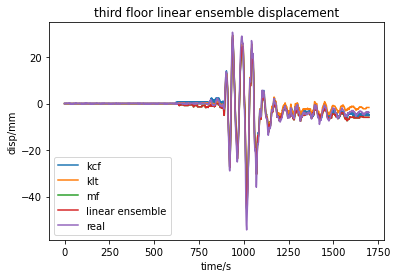

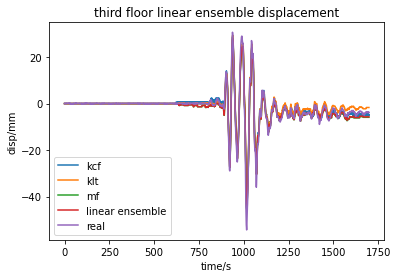

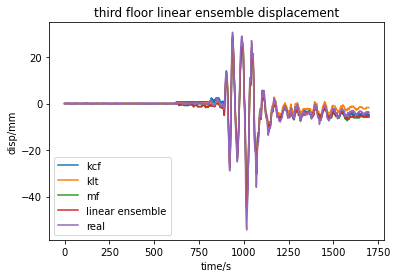

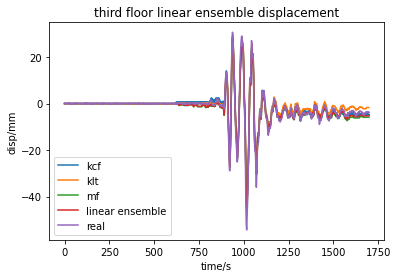

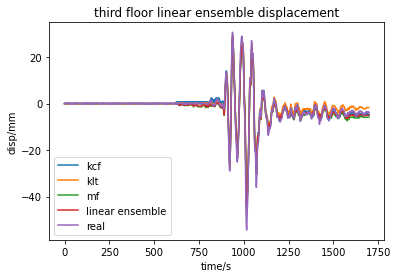

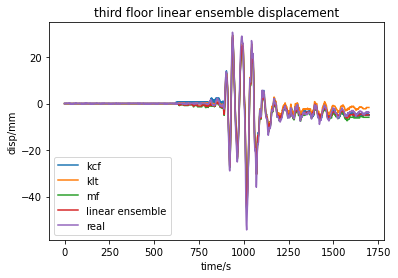

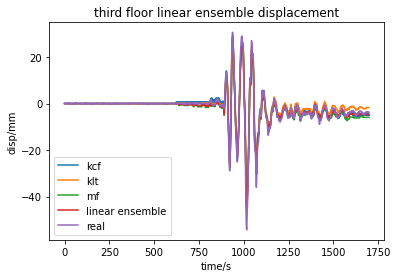

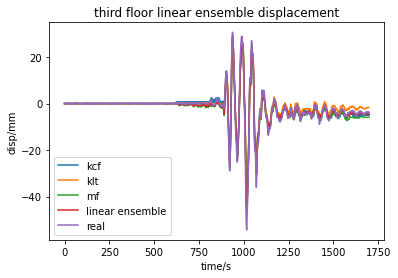

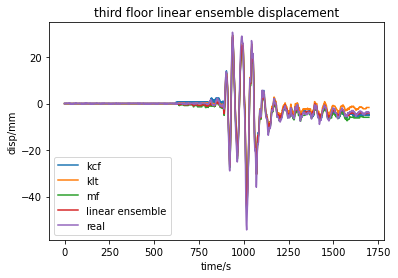

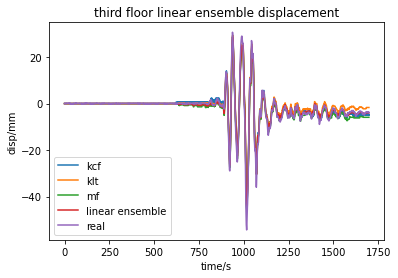

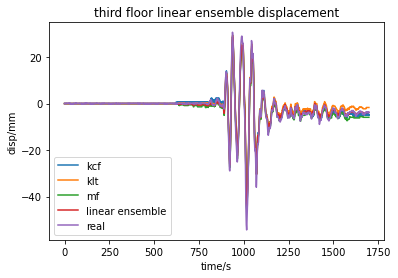

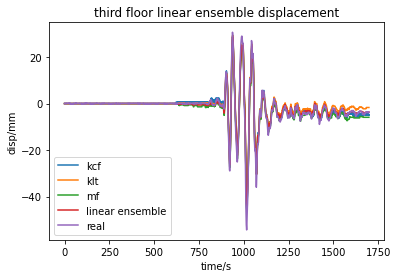

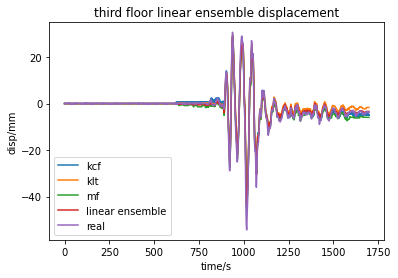

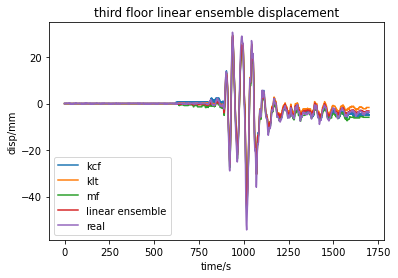

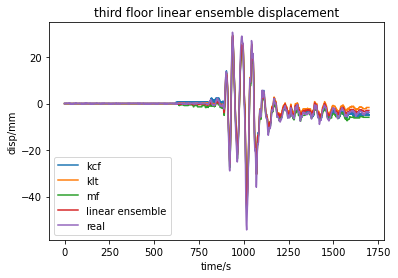

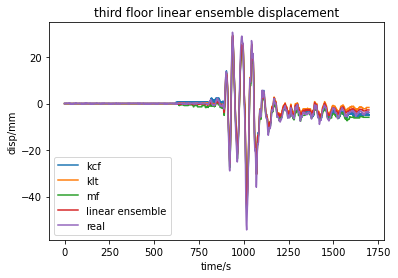

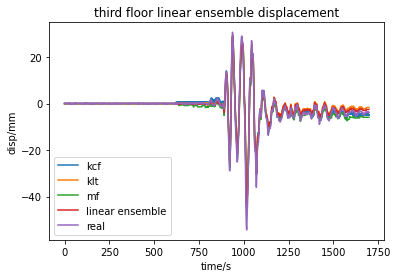

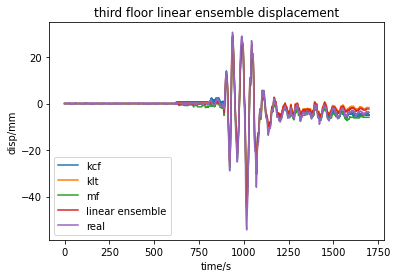

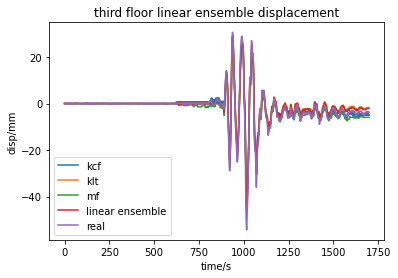

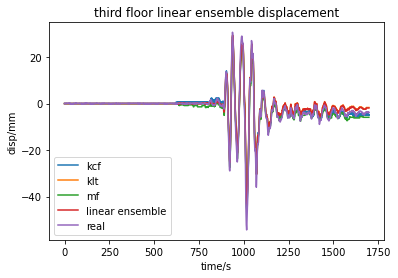

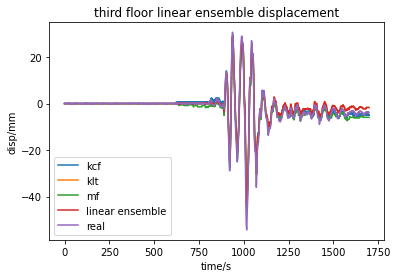

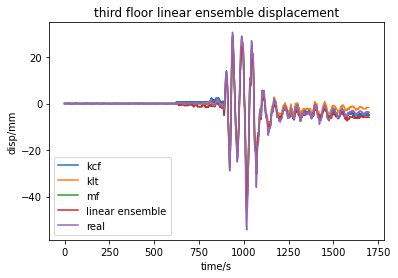

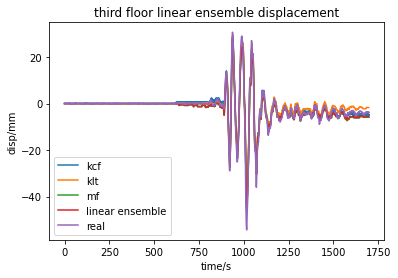

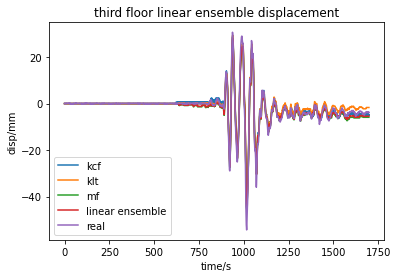

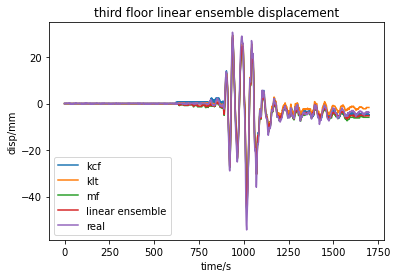

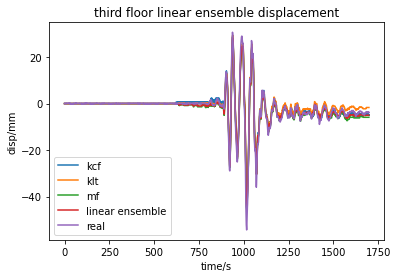

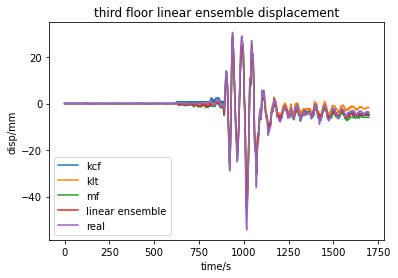

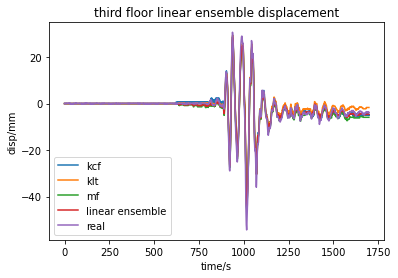

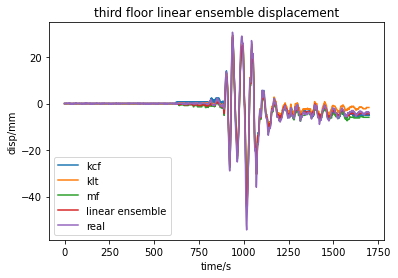

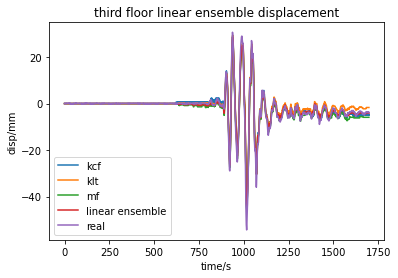

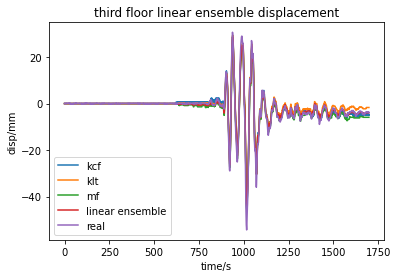

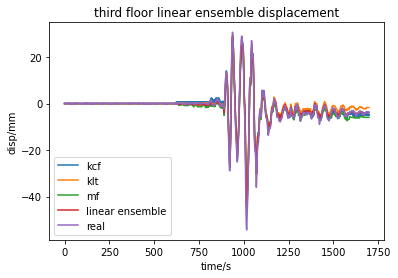

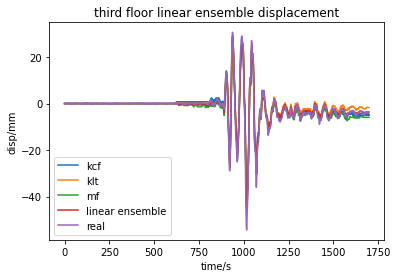

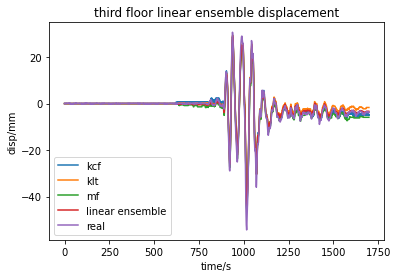

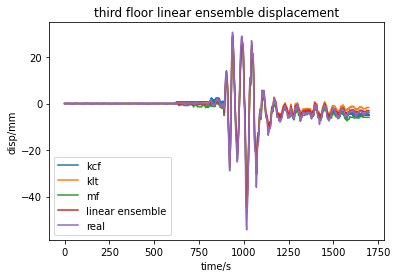

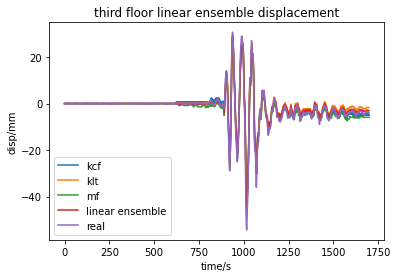

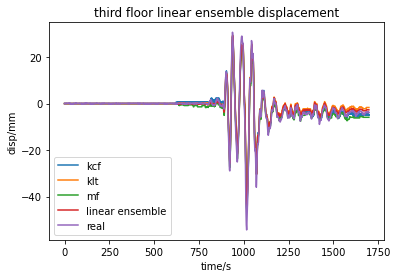

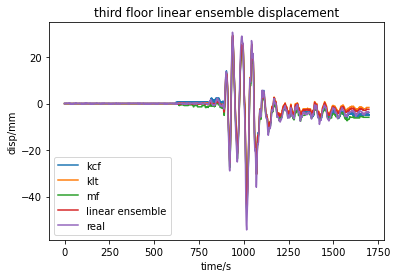

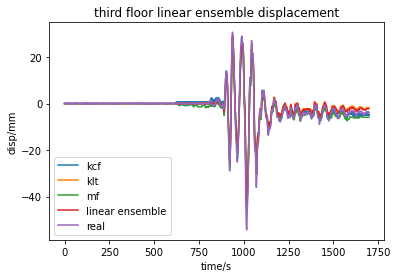

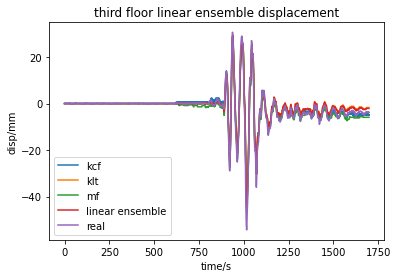

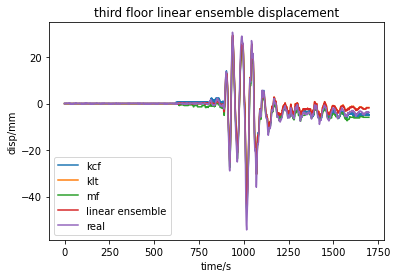

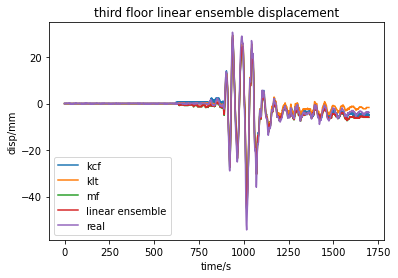

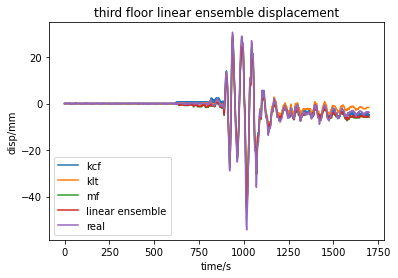

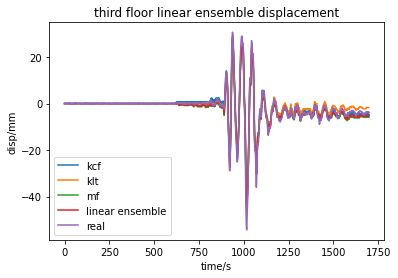

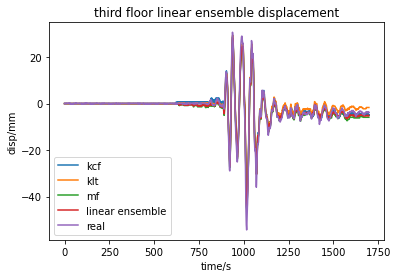

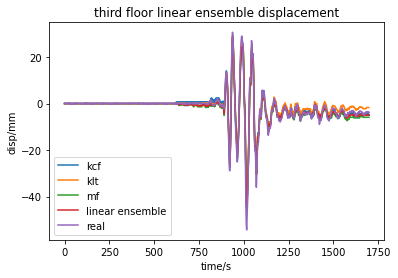

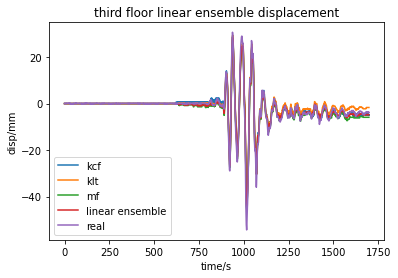

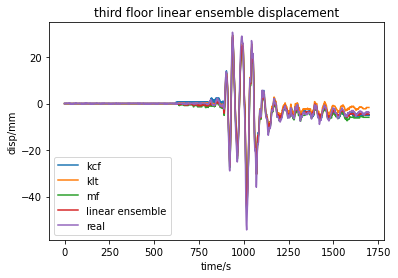

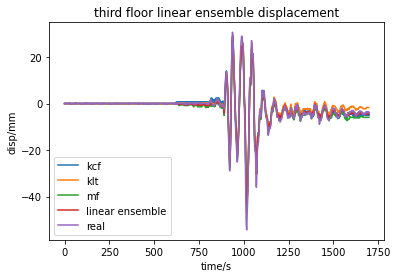

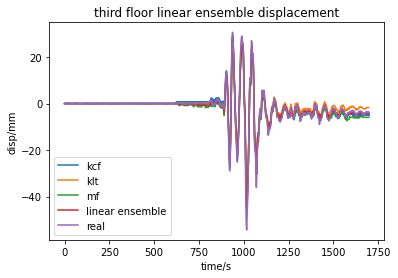

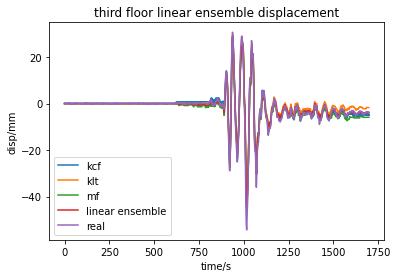

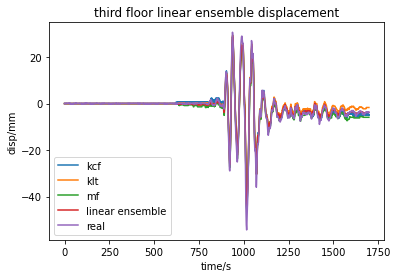

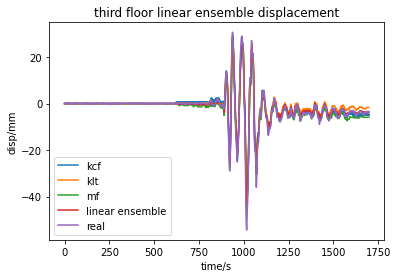

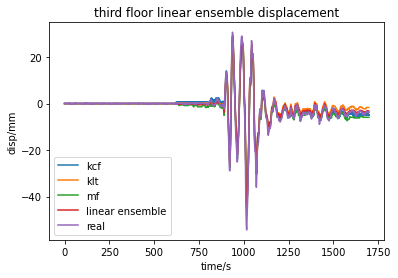

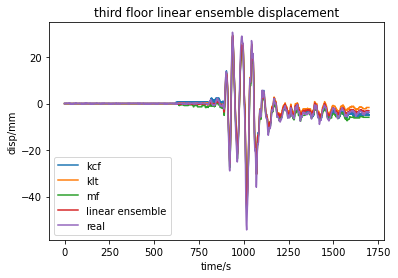

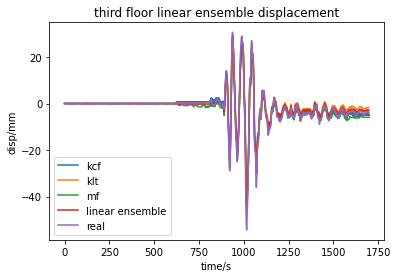

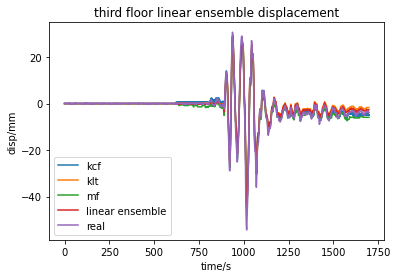

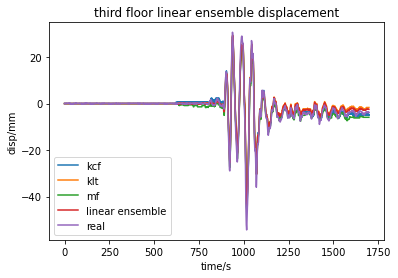

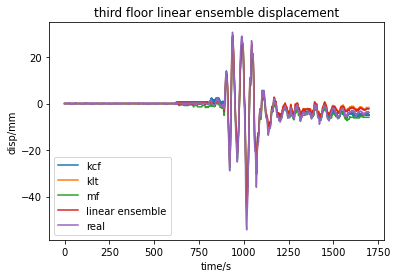

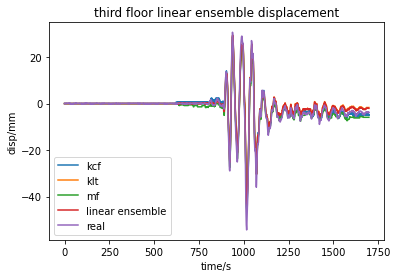

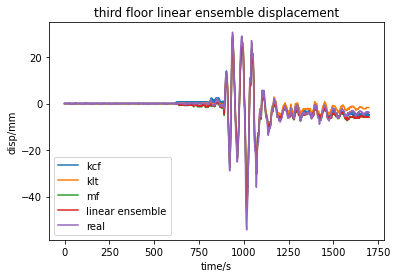

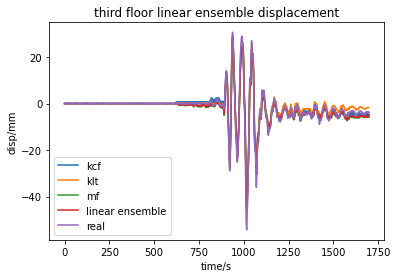

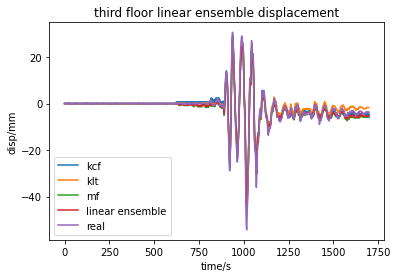

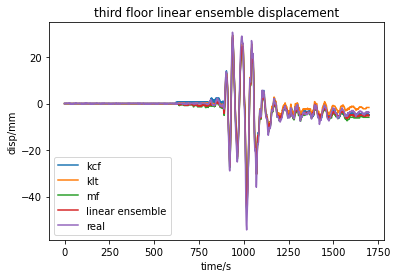

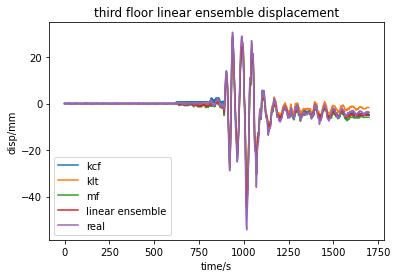

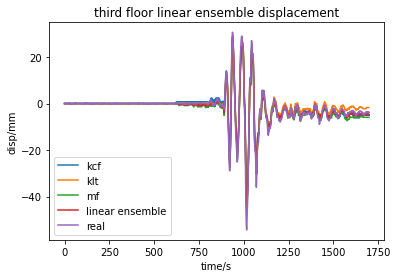

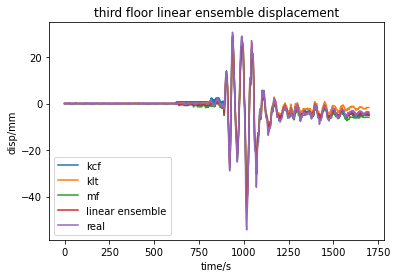

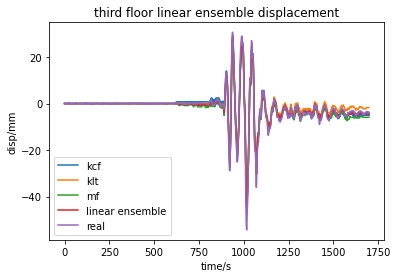

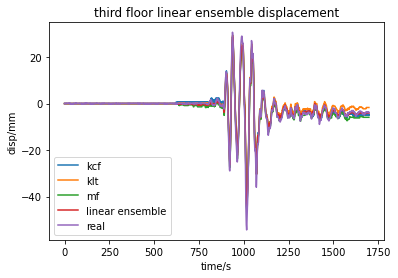

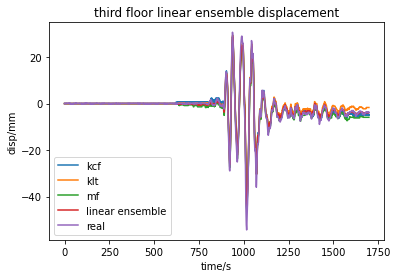

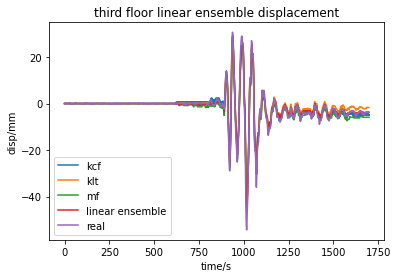

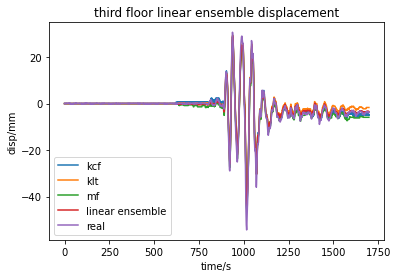

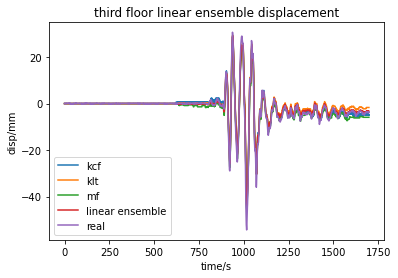

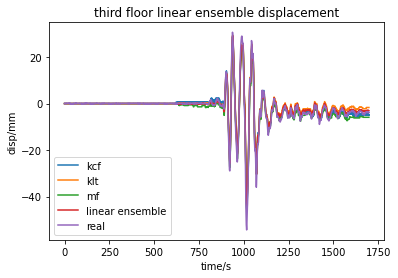

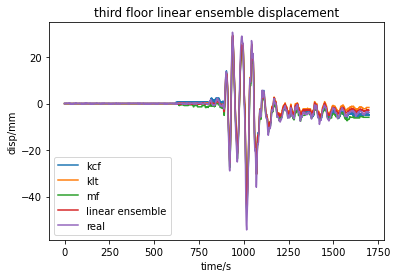

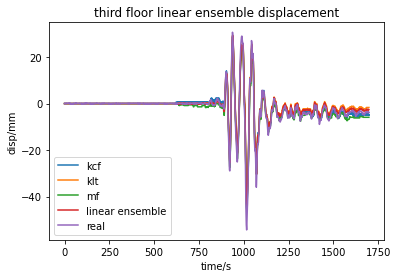

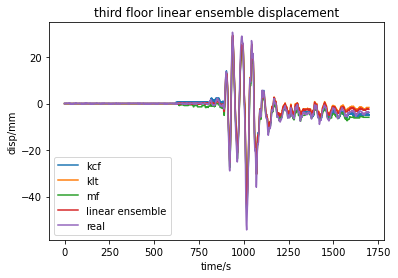

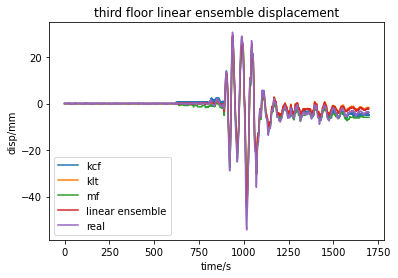

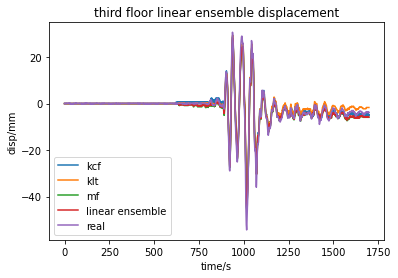

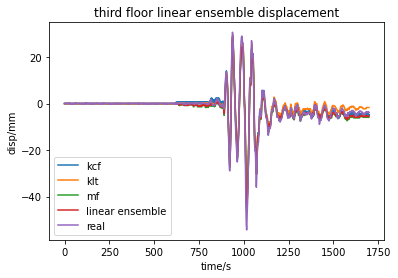

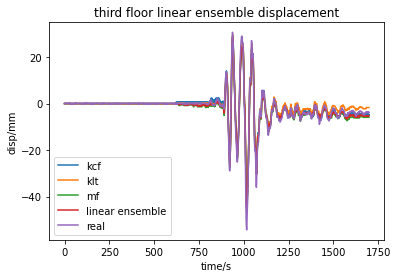

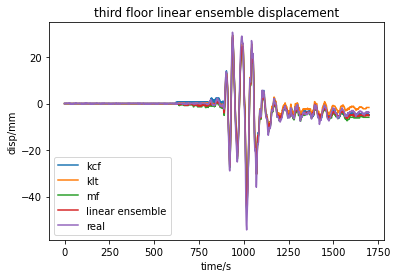

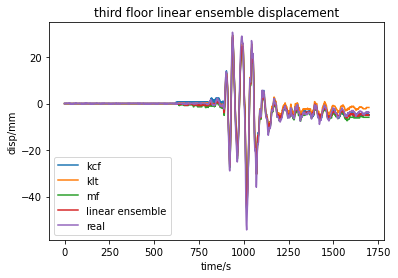

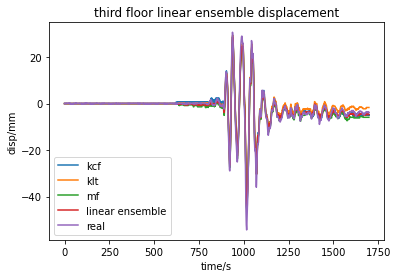

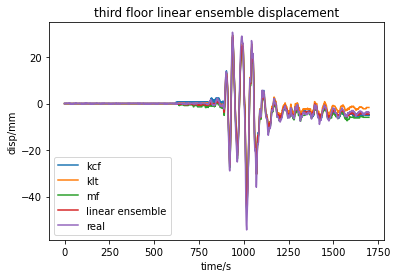

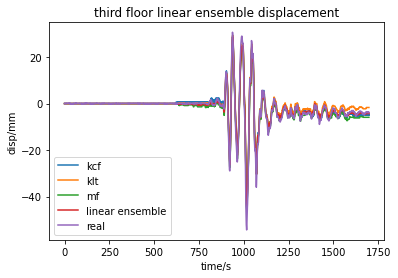

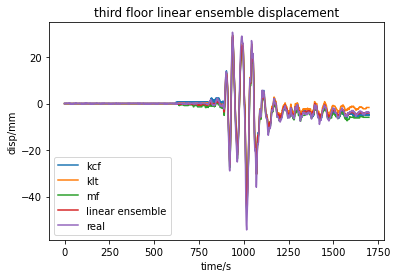

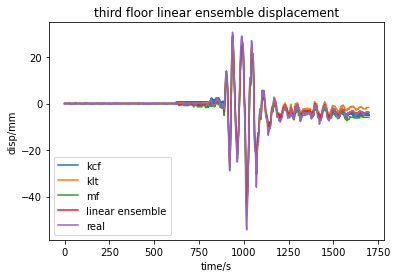

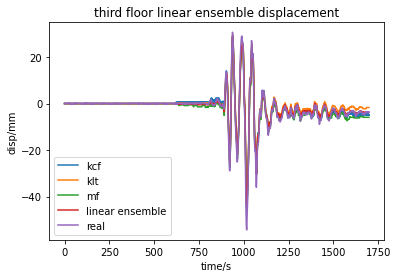

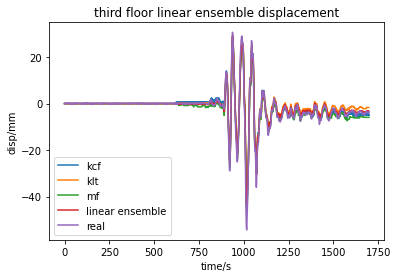

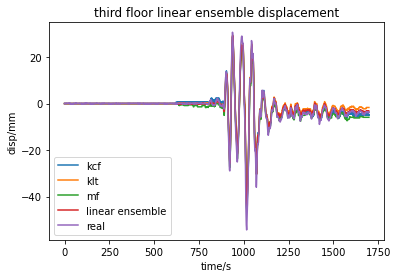

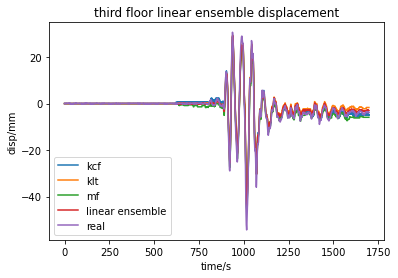

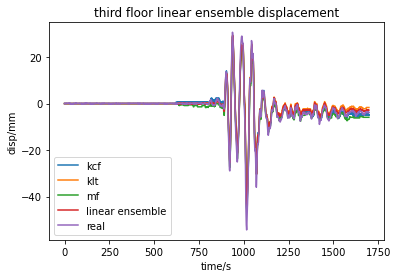

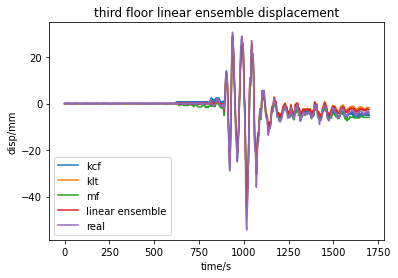

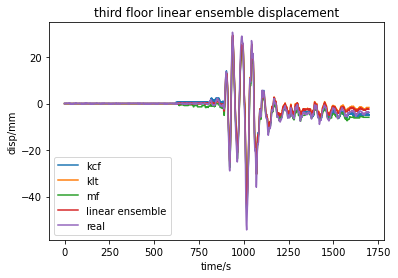

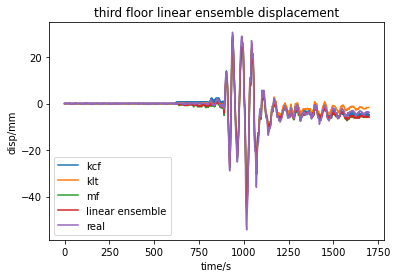

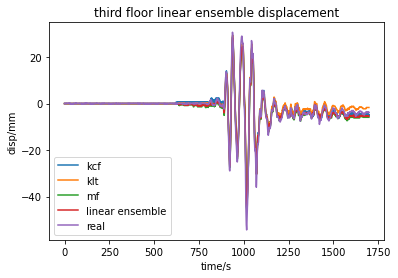

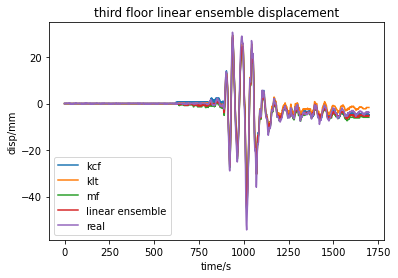

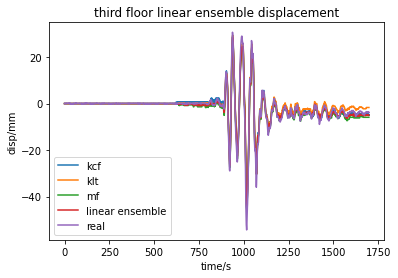

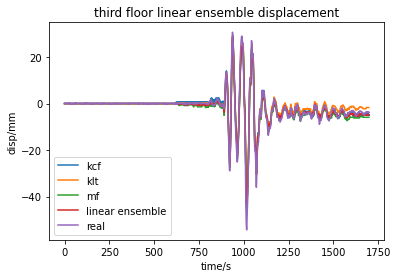

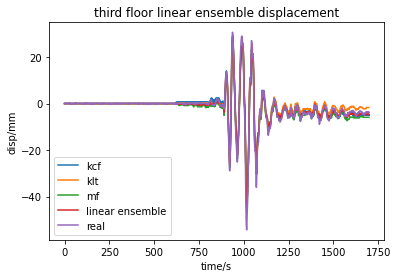

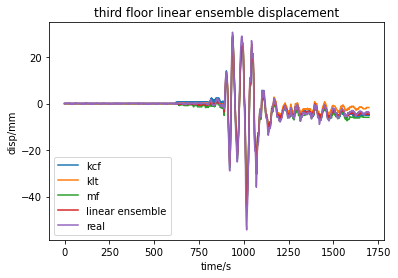

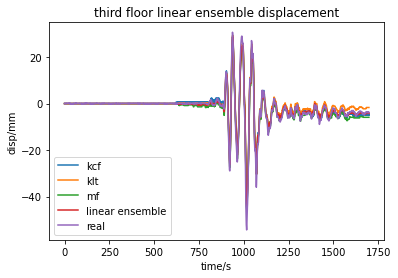

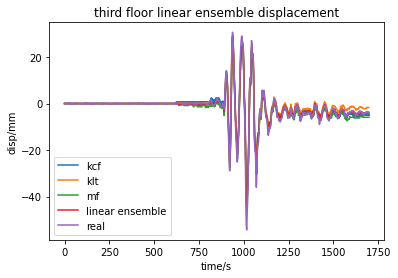

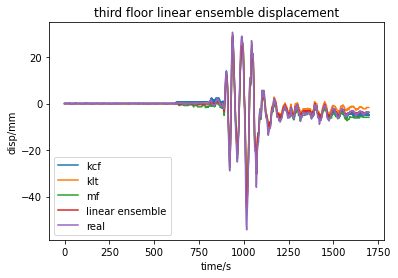

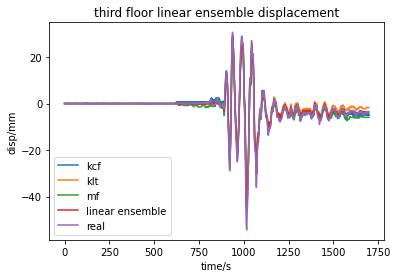

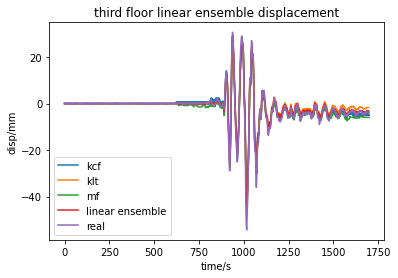

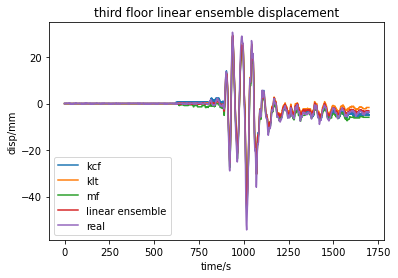

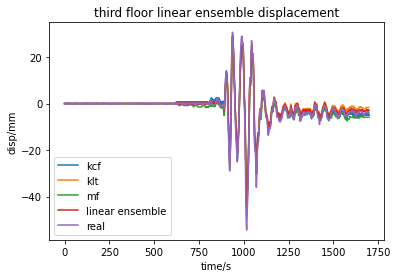

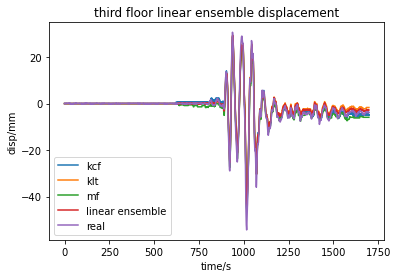

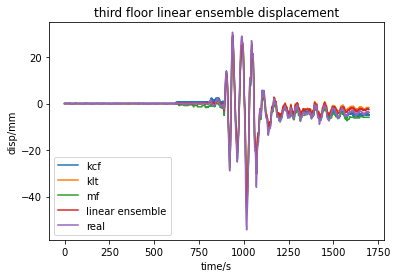

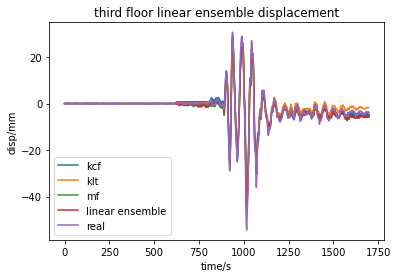

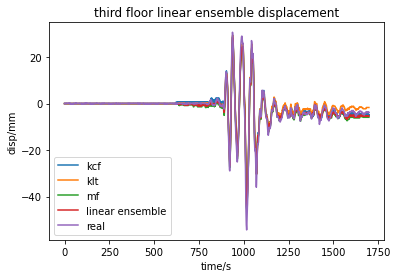

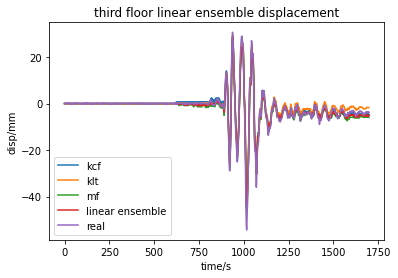

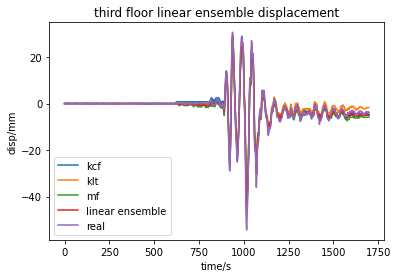

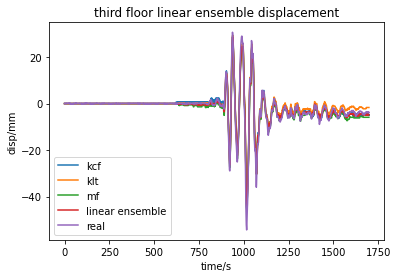

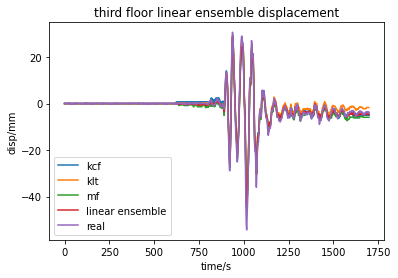

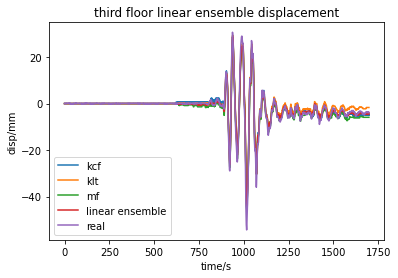

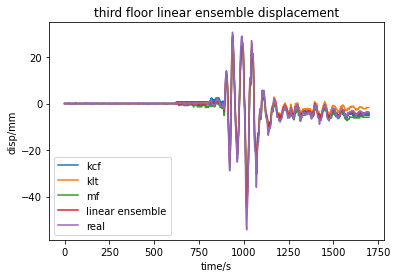

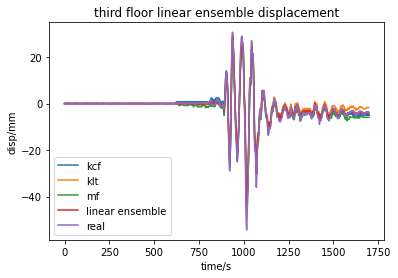

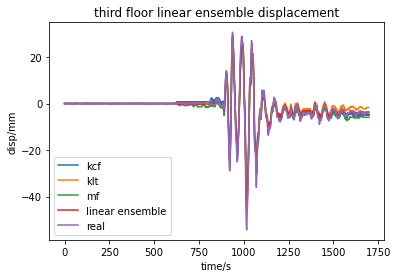

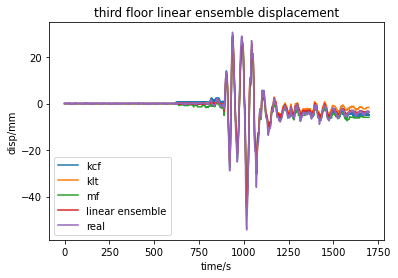

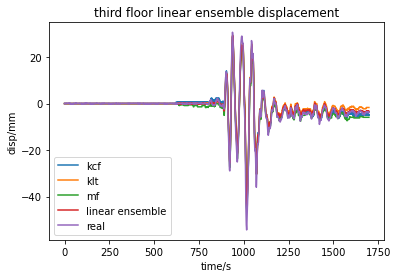

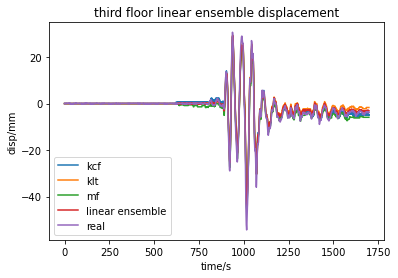

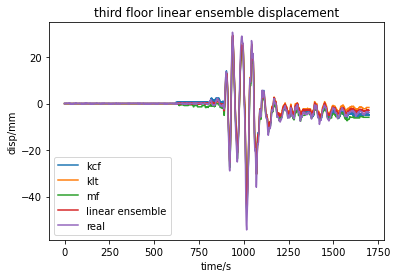

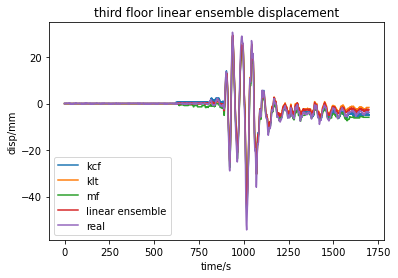

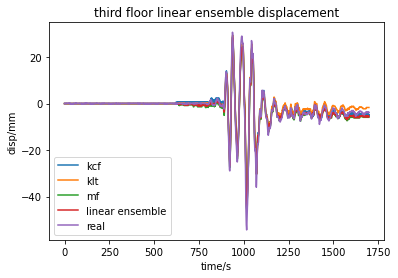

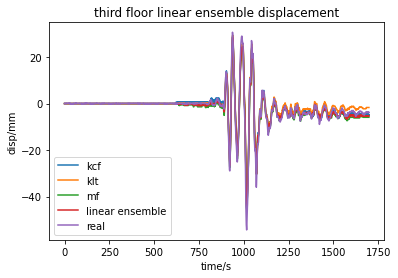

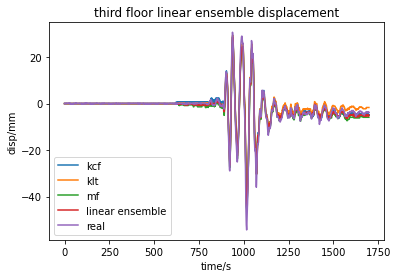

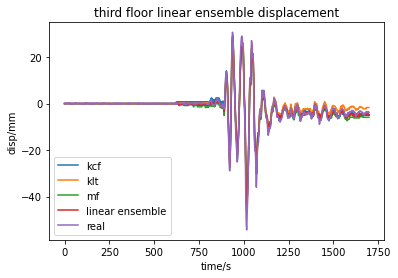

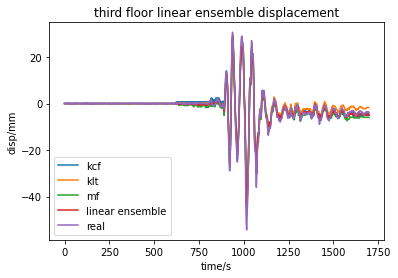

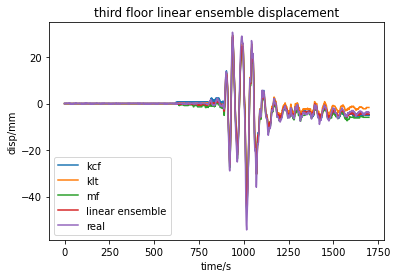

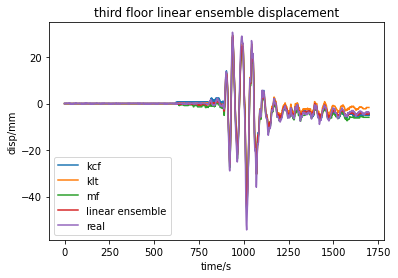

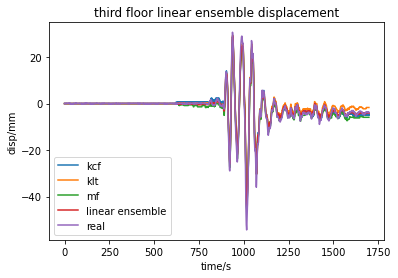

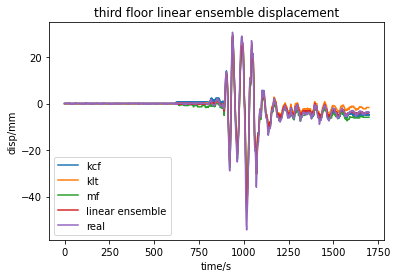

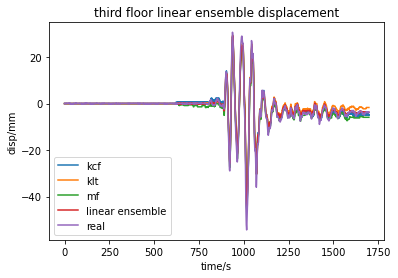

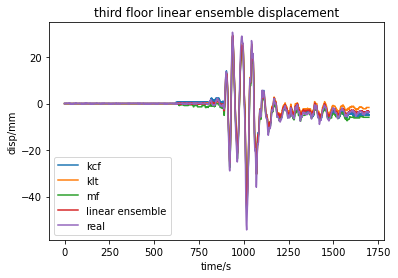

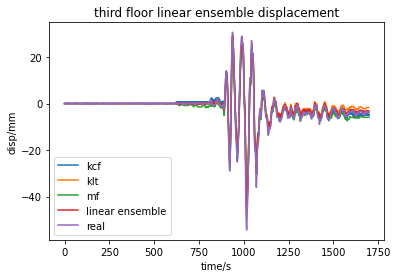

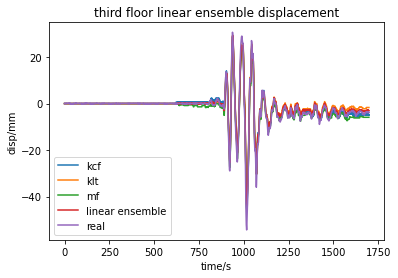

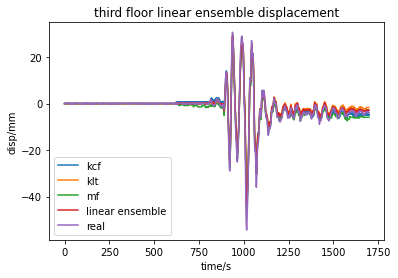

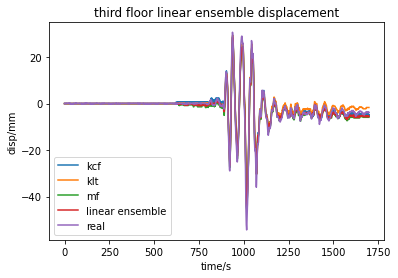

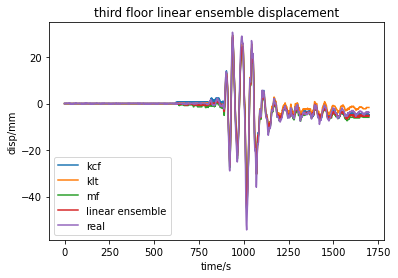

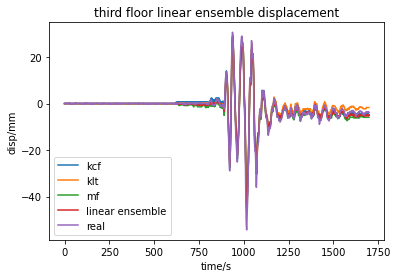

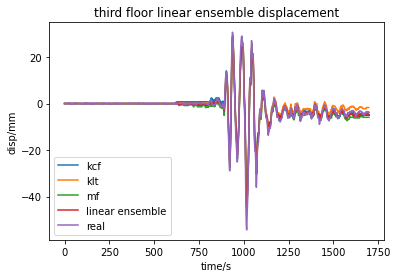

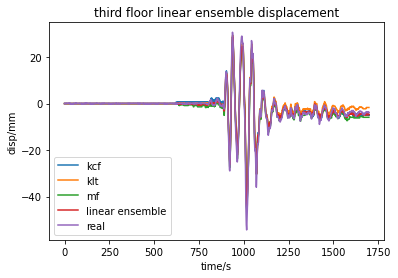

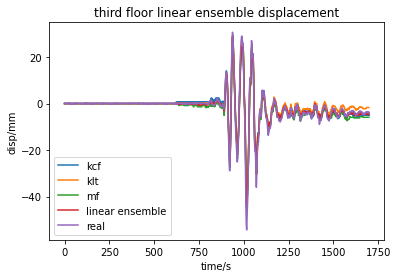

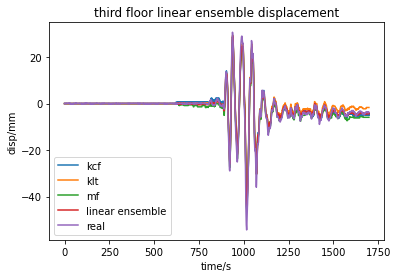

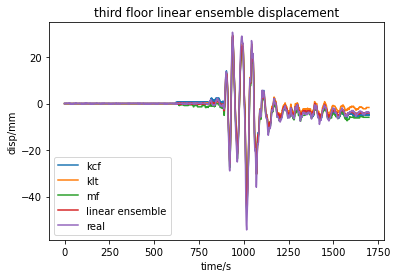

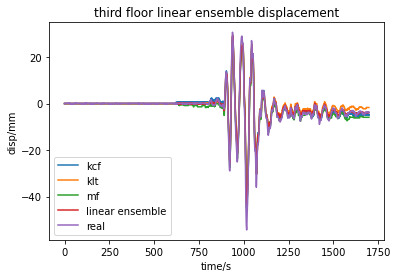

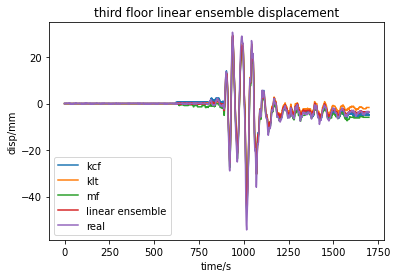

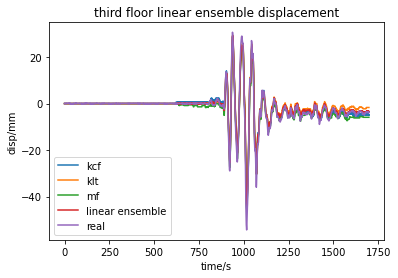

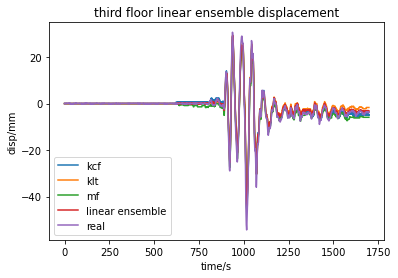

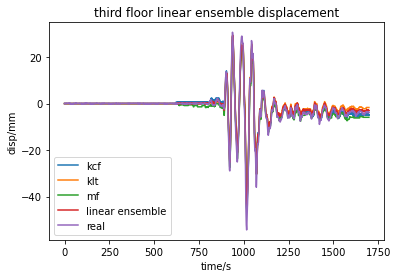

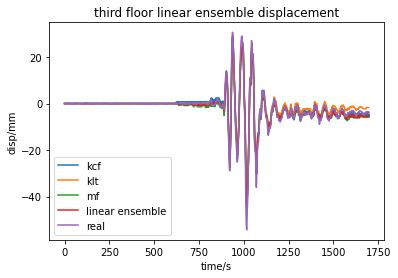

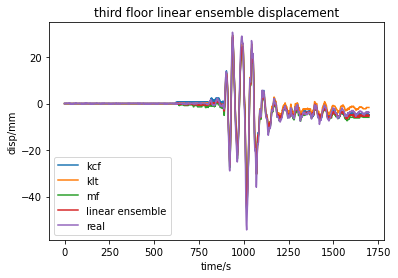

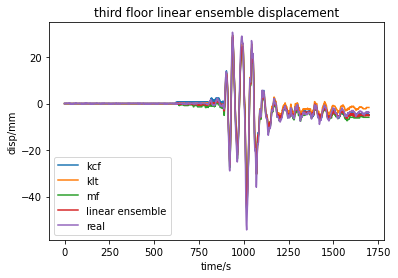

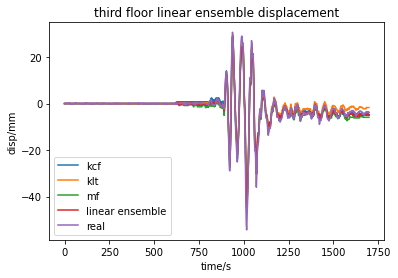

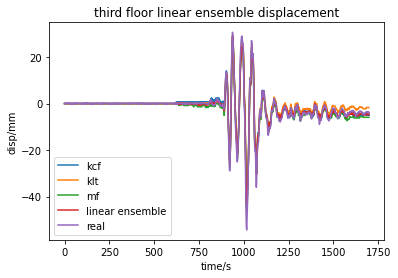

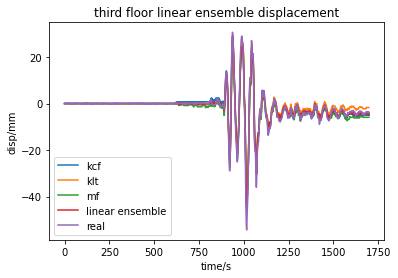

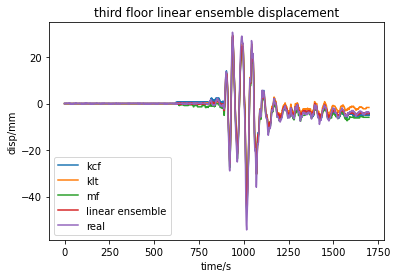

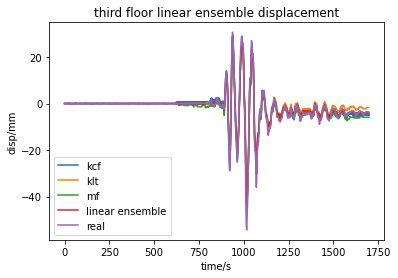

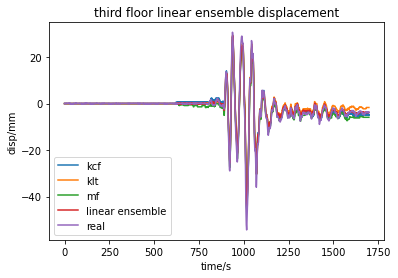

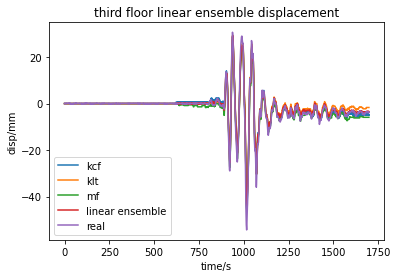

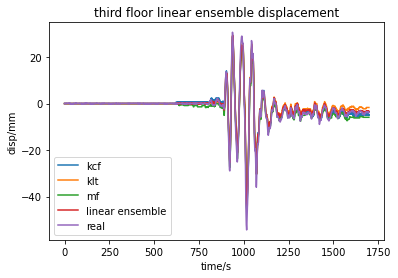

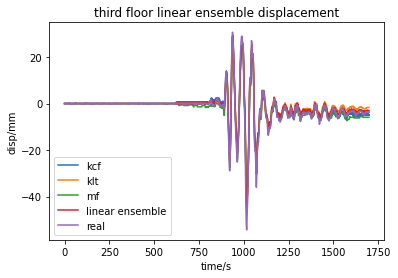

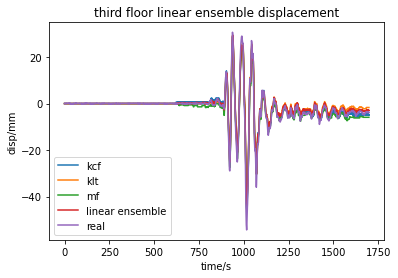

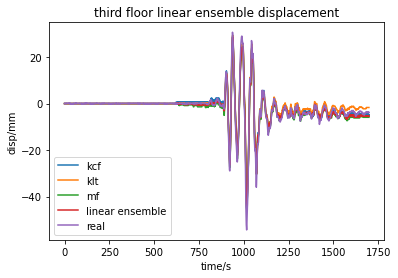

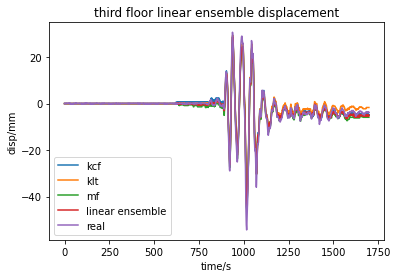

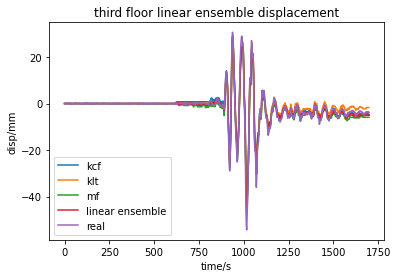

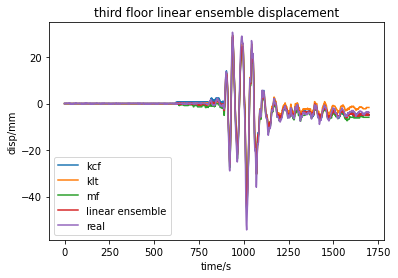

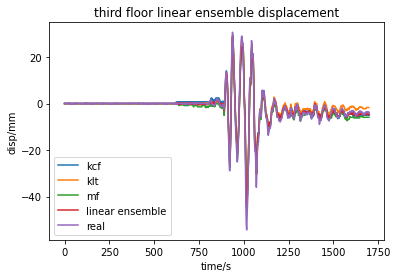

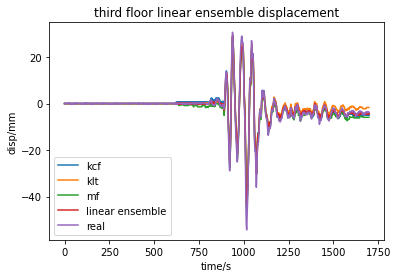

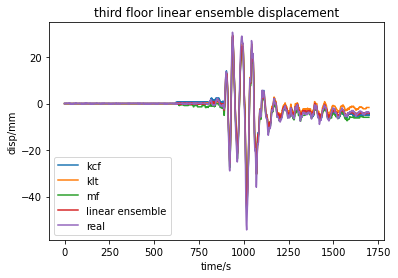

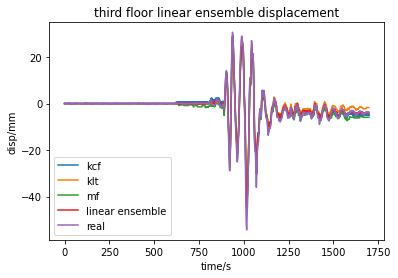

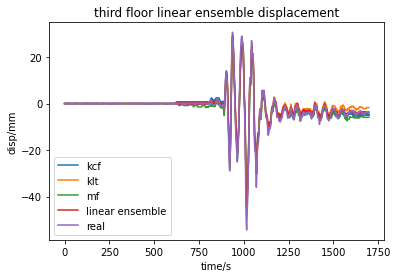

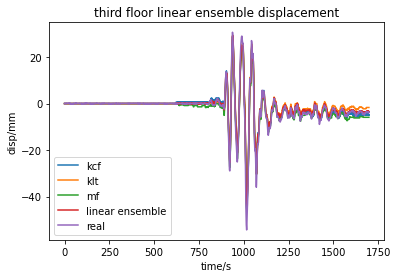

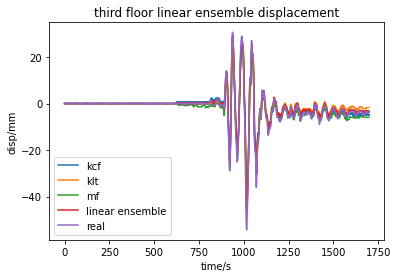

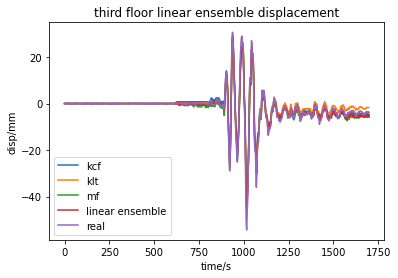

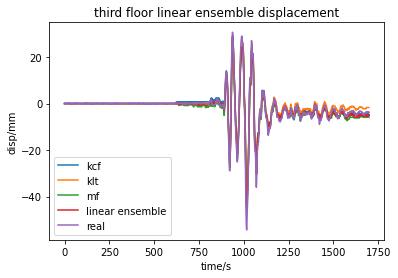

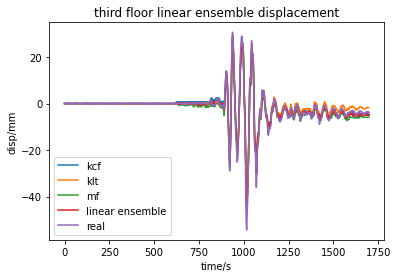

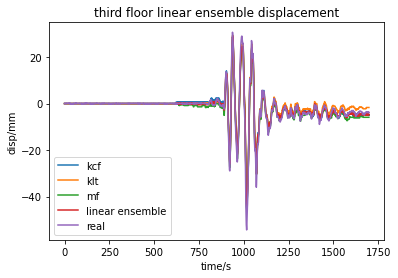

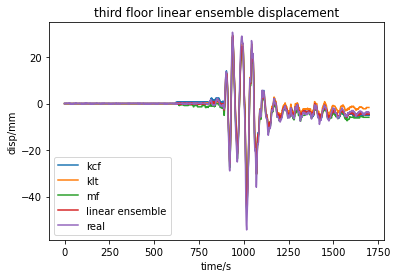

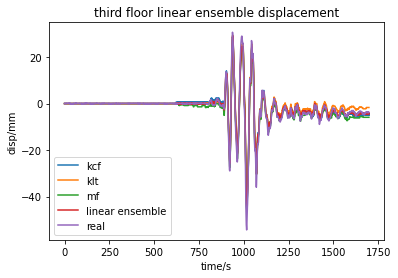

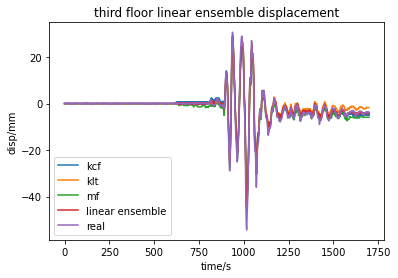

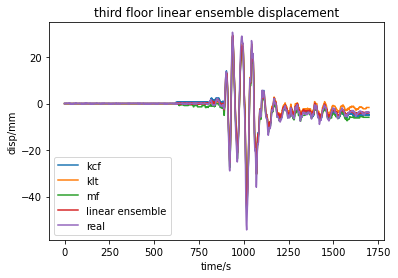

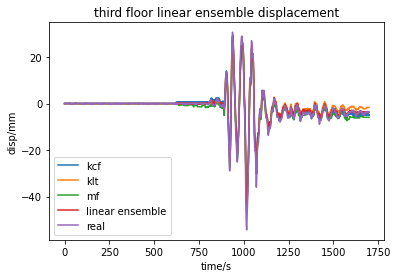

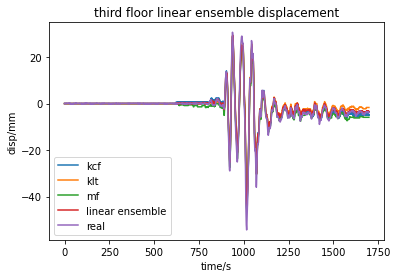

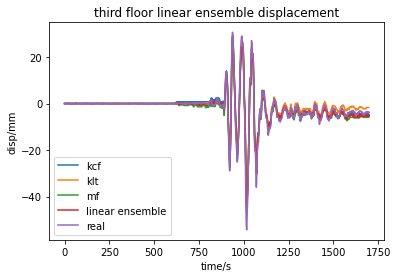

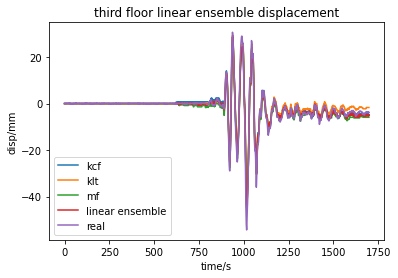

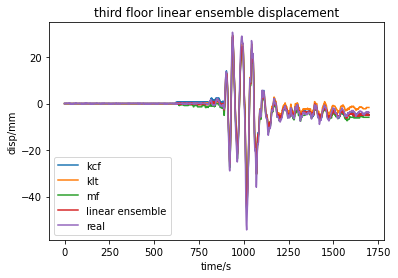

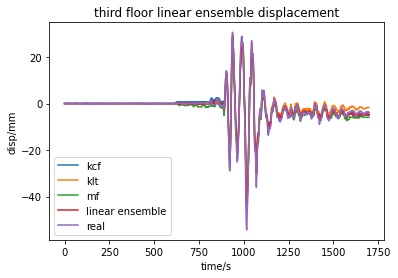

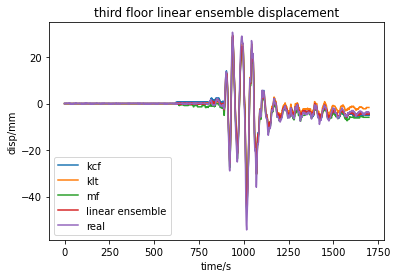

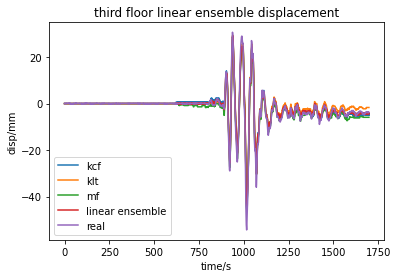

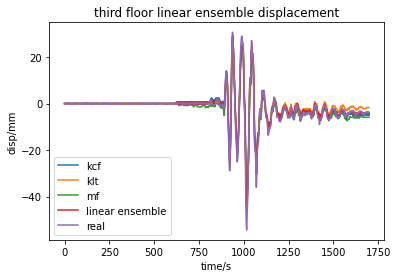

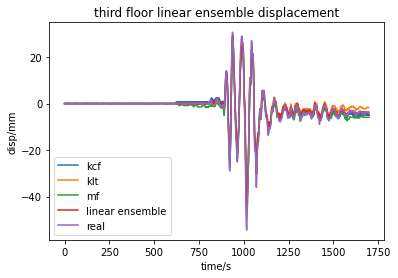

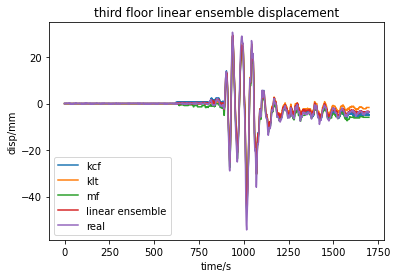

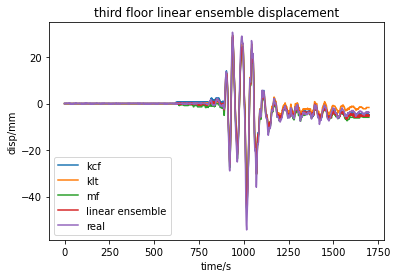

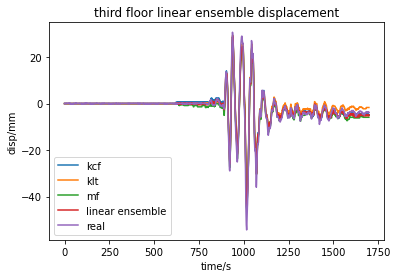

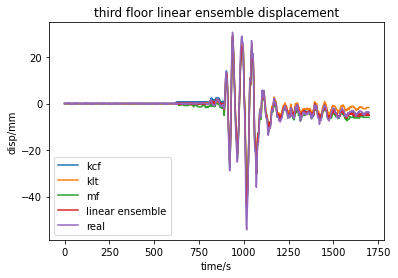

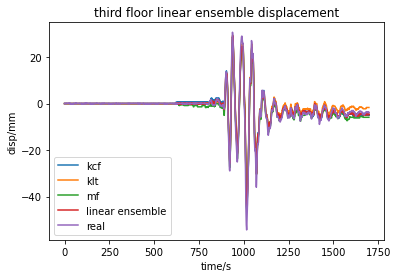

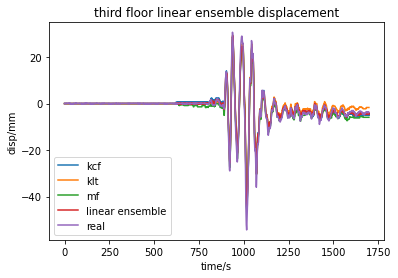

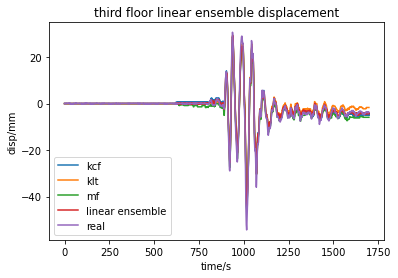

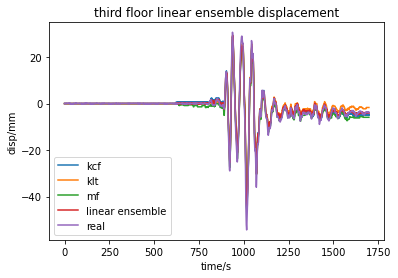

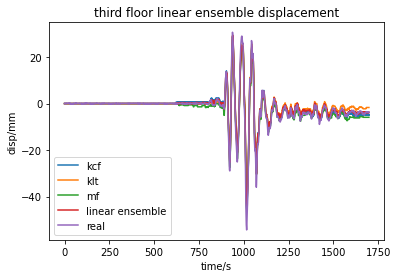

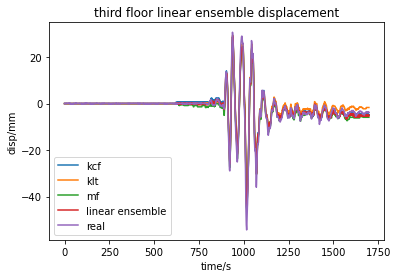

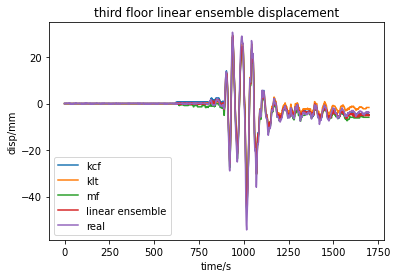

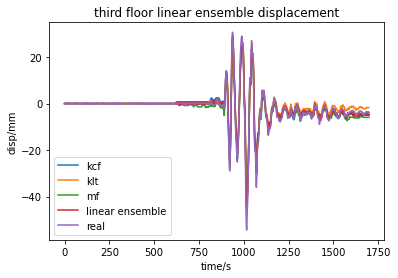

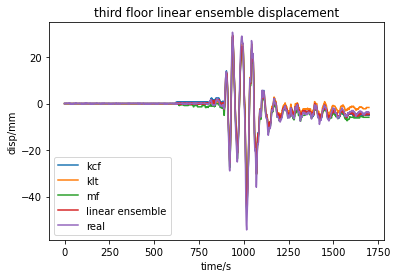

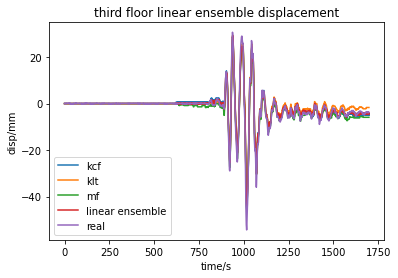

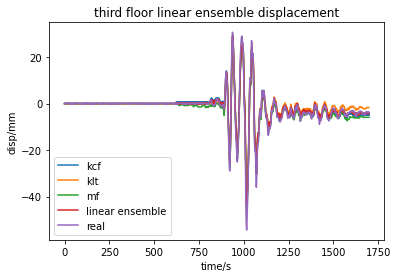

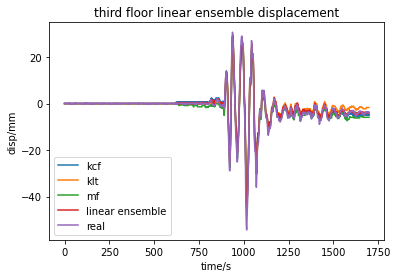

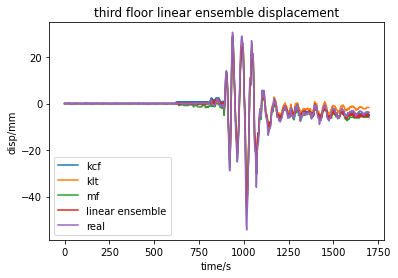

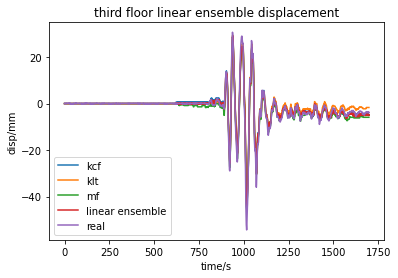

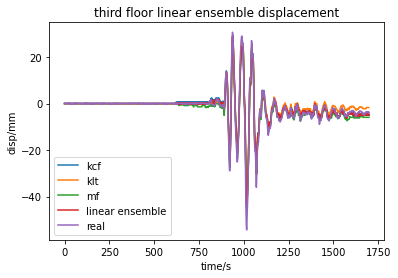

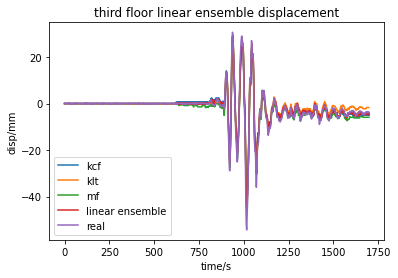

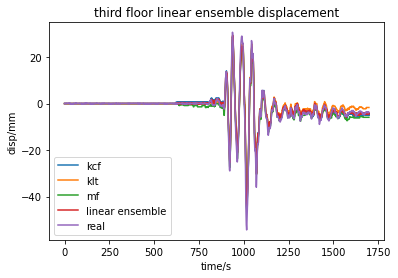

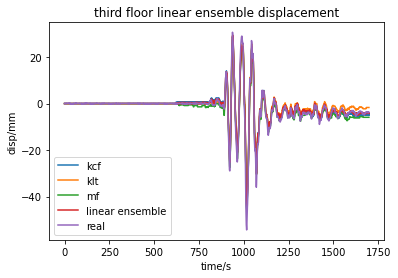

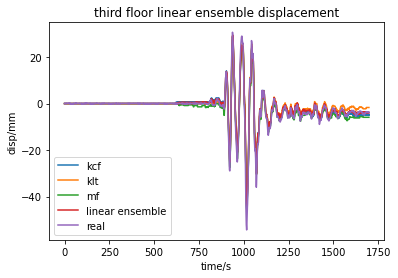

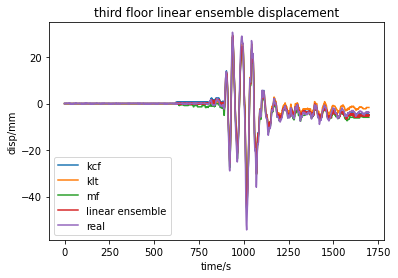

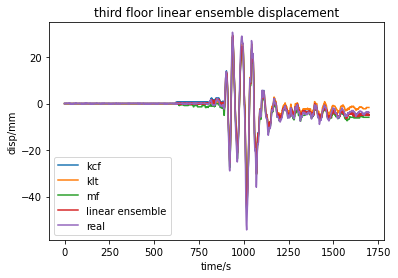

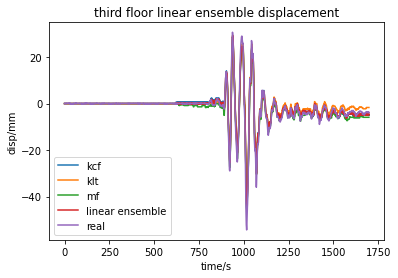

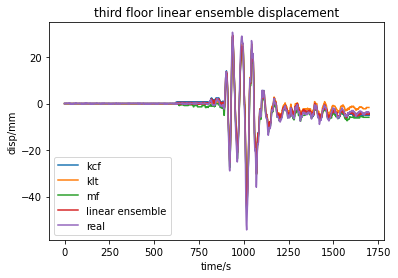

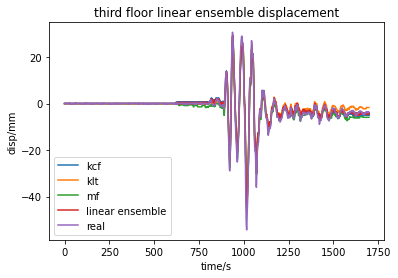

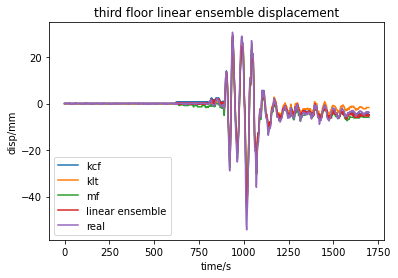

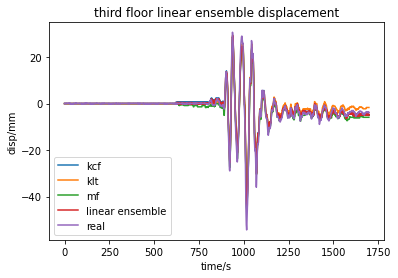

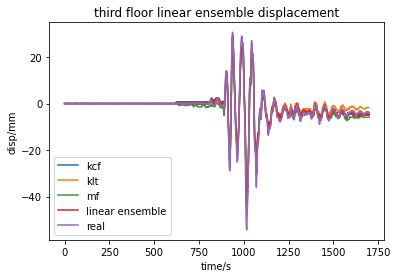

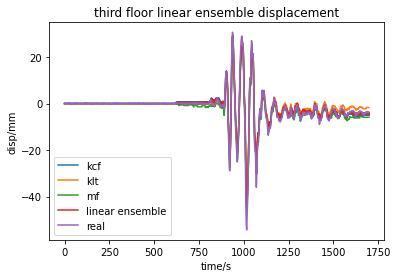

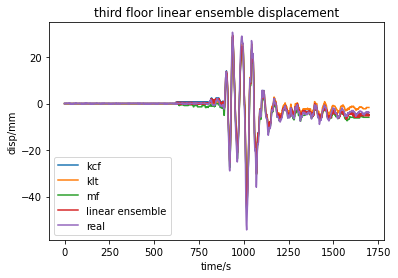

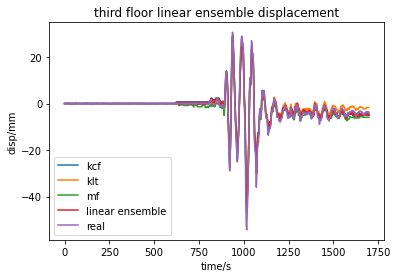

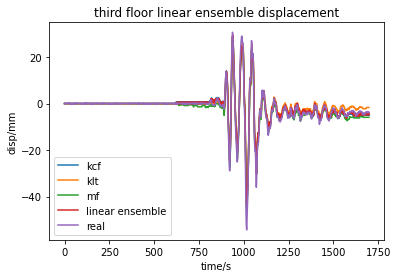

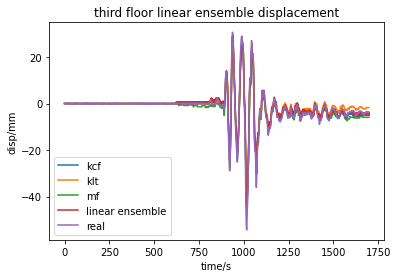

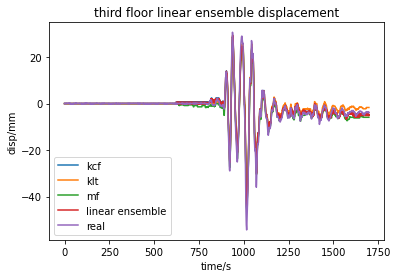

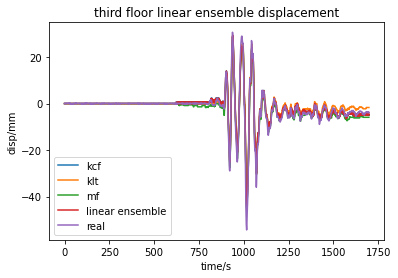

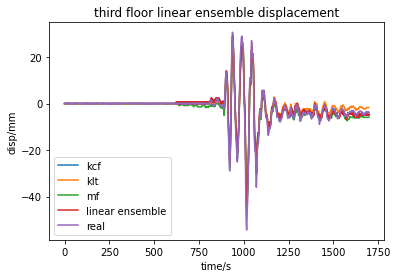

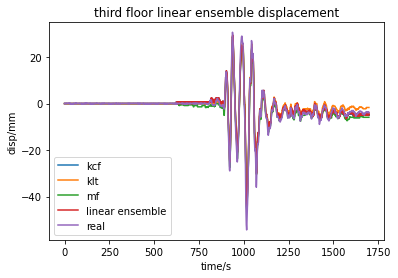

In [5]:
record = []
for _ in np.arange(0,1.05,0.05):
    for __ in np.arange(0, 1.05-_, 0.05):
        mse, rmse, mae, smape = linear(df1_1, df2_1, df3_1, _, __)
        record.append([_, __, mse, rmse, mae, smape])

In [6]:
df_l1 = pd.DataFrame(record)
df_l1.columns=['a', 'b', 'mse', 'rmse', 'mae', 'smape']
df_l1

a     b       mse      rmse       mae     smape
0    0.00  0.00  2.610190  1.615608  0.965506  1.149055
1    0.00  0.05  2.499127  1.580863  0.929792  1.140419
2    0.00  0.10  2.404122  1.550523  0.895834  1.132004
3    0.00  0.15  2.325173  1.524852  0.864598  1.123938
4    0.00  0.20  2.262282  1.504089  0.835801  1.116172
..    ...   ...       ...       ...       ...       ...
230  0.90  0.15  2.744798  1.656743  0.849485  1.077581
231  0.95  0.00  2.691860  1.640689  0.855086  1.106346
232  0.95  0.05  2.720860  1.649503  0.854812  1.120111
233  1.00  0.00  2.758181  1.660777  0.869233  1.131547
234  1.00  0.05  2.794552  1.671691  0.870728  1.085645

[235 rows x 6 columns]

In [7]:
df_l1[df_l1['mse']==min(df_l1['mse'])]

a     b       mse      rmse      mae   smape
7  0.0  0.35  2.169953  1.473076  0.76962  1.0963

In [8]:
df_l1[df_l1['rmse']==min(df_l1['rmse'])]

a     b       mse      rmse      mae   smape
7  0.0  0.35  2.169953  1.473076  0.76962  1.0963

In [9]:
df_l1[df_l1['mae']==min(df_l1['mae'])]

a    b       mse      rmse       mae     smape
103  0.25  0.4  2.270575  1.506843  0.733749  1.070257

In [10]:
df_l1[df_l1['smape']==min(df_l1['smape'])]

a     b      mse      rmse       mae     smape
147  0.4  0.35  2.34426  1.531098  0.740536  1.046634

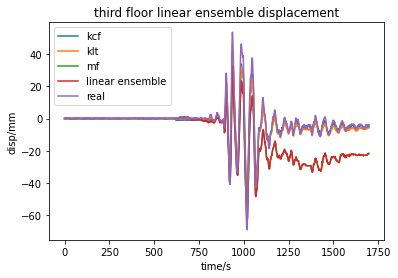

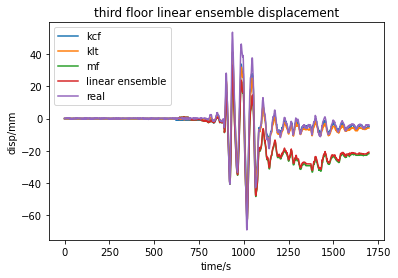

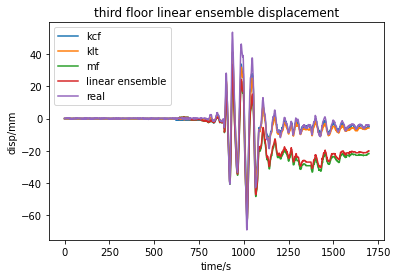

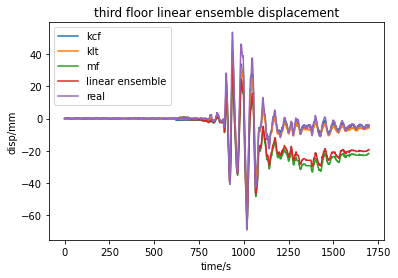

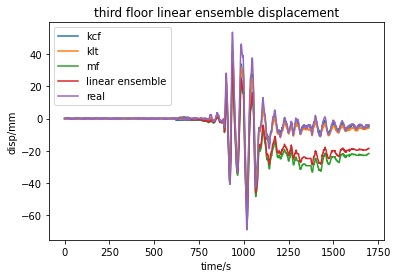

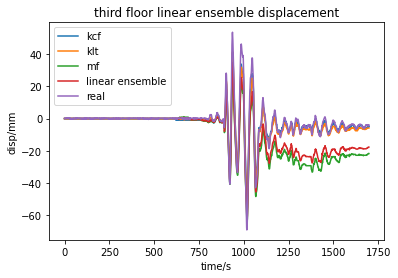

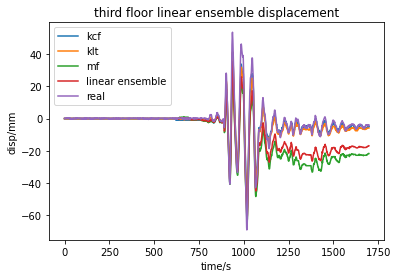

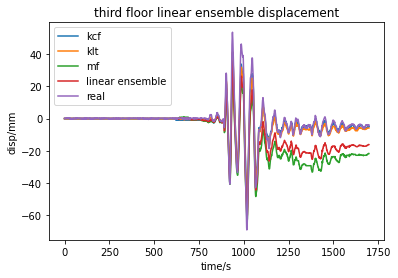

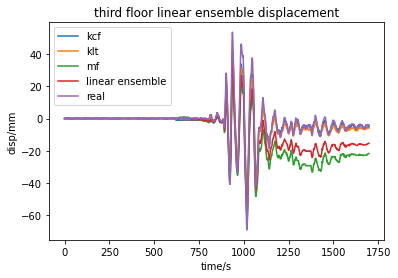

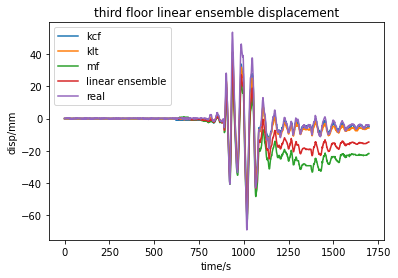

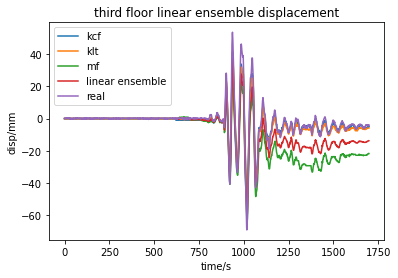

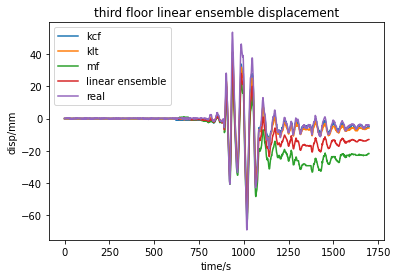

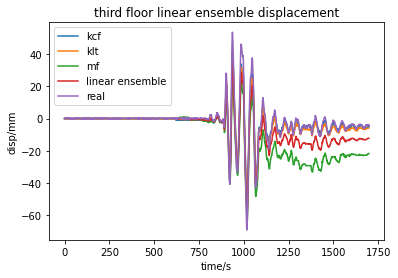

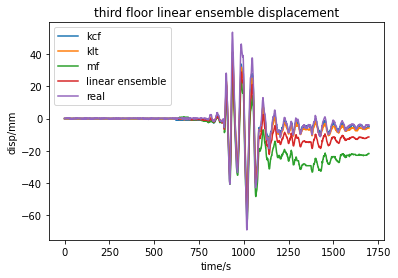

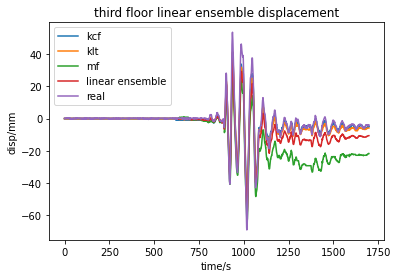

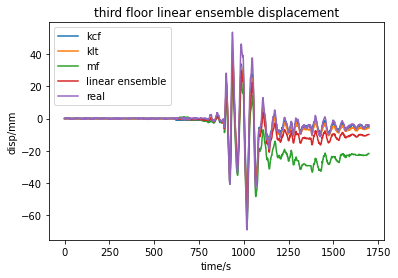

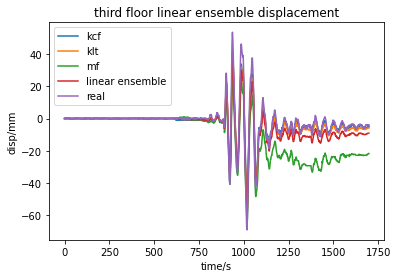

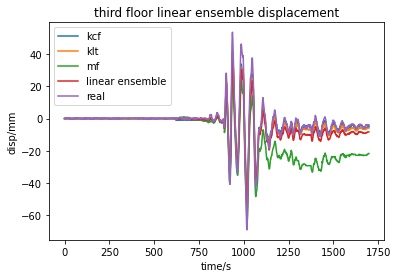

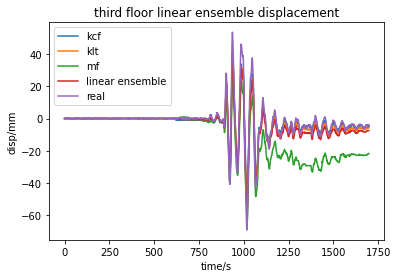

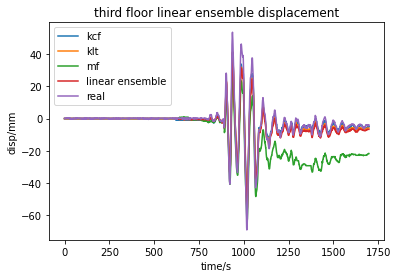

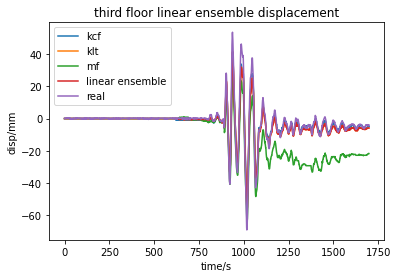

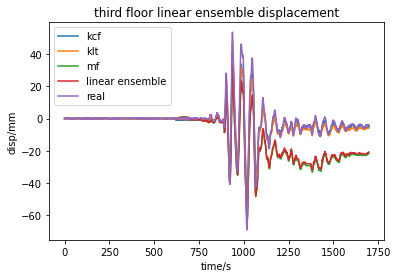

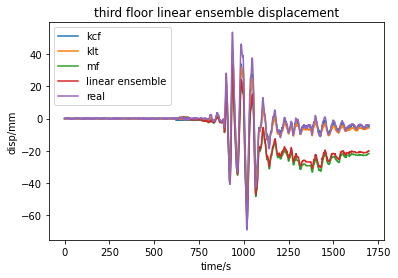

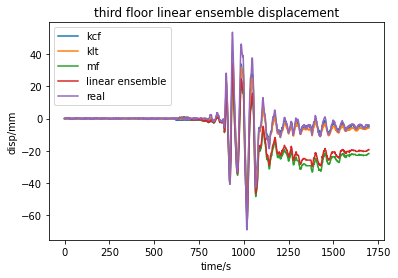

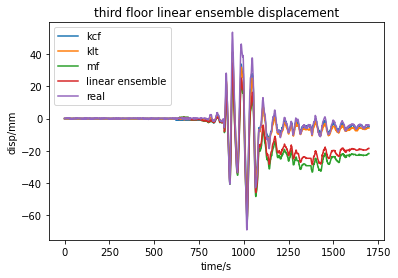

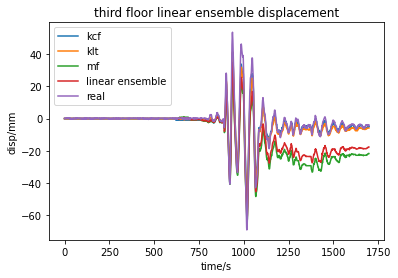

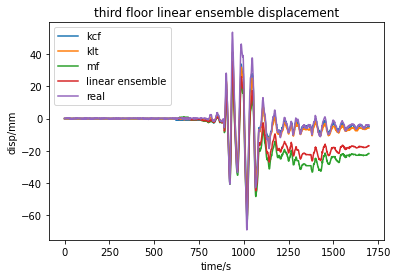

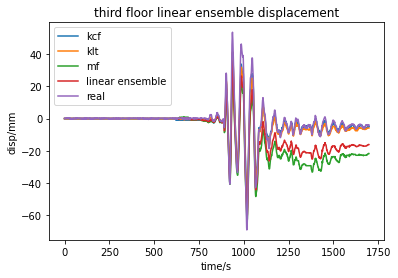

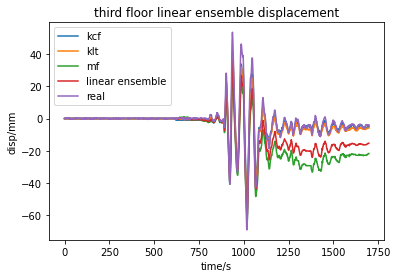

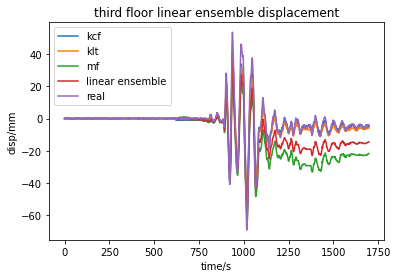

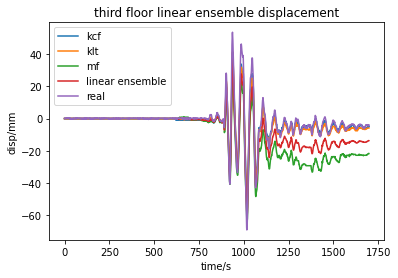

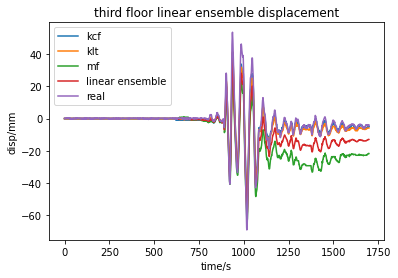

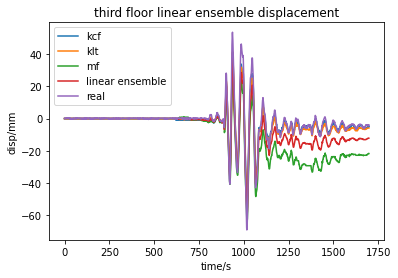

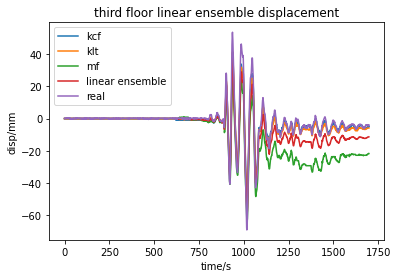

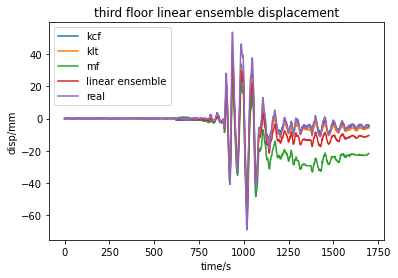

KeyboardInterrupt: 

In [11]:
record = []
for _ in np.arange(0,1.05,0.05):
    for __ in np.arange(0, 1.05-_,0.05):
        mse, rmse, mae, smape = linear(df1_2, df2_2, df3_2, _, __)
        record.append([_, __, mse, rmse, mae, smape])

In [12]:
df_l2 = pd.DataFrame(record)
df_l2.columns=['a', 'b', 'mse', 'rmse', 'mae', 'smape']
df_l2

a     b         mse       rmse       mae     smape
0   0.00  0.00  163.384641  12.782200  8.587886  1.563018
1   0.00  0.05  149.702030  12.235278  8.219047  1.550778
2   0.00  0.10  136.646834  11.689604  7.851123  1.538851
3   0.00  0.15  124.219053  11.145360  7.483808  1.527302
4   0.00  0.20  112.418687  10.602768  7.117274  1.515318
5   0.00  0.25  101.245736  10.062094  6.753674  1.502303
6   0.00  0.30   90.700201   9.523665  6.391960  1.488082
7   0.00  0.35   80.782080   8.987885  6.032164  1.472664
8   0.00  0.40   71.491375   8.455257  5.674434  1.456569
9   0.00  0.45   62.828084   7.926417  5.319301  1.440884
10  0.00  0.50   54.792209   7.402176  4.966350  1.426036
11  0.00  0.55   47.383748   6.883585  4.618171  1.412676
12  0.00  0.60   40.602703   6.372025  4.273310  1.408226
13  0.00  0.65   34.449073   5.869333  3.931627  1.383038
14  0.00  0.70   28.922858   5.377998  3.592656  1.364378
15  0.00  0.75   24.024058   4.901434  3.255319  1.346282
16  0.00  0.80   19.752673   4.444398  2.918884  1.318095
17  0.00  0.85   16.108703   4.013565  2.584880  1.290609
18  0.00  0.90   13.092148   3.618307  2.255755  1.260761
19  0.00  0.95   10.703008   3.271545  1.933639  1.227945
20  0.00  1.00    8.941283   2.990198  1.625622  1.191349
21  0.05  0.00  148.575128  12.189140  8.188662  1.547722
22  0.05  0.05  135.574013  11.643625  7.820910  1.536839
23  0.05  0.10  123.200313  11.099564  7.453597  1.525336
24  0.05  0.15  111.454028  10.557179  7.087063  1.513130
25  0.05  0.20  100.335158  10.016744  6.723863  1.499854
26  0.05  0.25   89.843703   9.478592  6.362385  1.485431
27  0.05  0.30   79.979663   8.943135  6.003054  1.469789
28  0.05  0.35   70.743039   8.410888  5.646343  1.454205
29  0.05  0.40   62.133829   7.882501  5.291423  1.438732
30  0.05  0.45   54.152034   7.358807  4.939428  1.424018
31  0.05  0.50   46.797655   6.840881  4.591855  1.411313
32  0.05  0.55   40.070690   6.330141  4.247583  1.405458
33  0.05  0.60   33.971141   5.828477  3.906337  1.381970
34  0.05  0.65   28.499006   5.338446  3.567759  1.362939

In [13]:
df_l2[df_l2['mse']==min(df_l2['mse'])]

a    b       mse      rmse       mae     smape
20  0.0  1.0  8.941283  2.990198  1.625622  1.191349

In [14]:
df_l2[df_l2['mae']==min(df_l2['mae'])]

a    b       mse      rmse       mae     smape
20  0.0  1.0  8.941283  2.990198  1.625622  1.191349

In [15]:
df_l2[df_l2['smape']==min(df_l2['smape'])]

a    b       mse      rmse       mae     smape
20  0.0  1.0  8.941283  2.990198  1.625622  1.191349

In [ ]:
record = []
for _ in np.arange(0,1.05,0.05):
    for __ in np.arange(0, 1.05-_,0.05):
        mse, rmse, mae, smape = linear(df1_3, df2_3, df3_3, _, __)
        record.append([_, __, mse, rmse, mae, smape])

In [ ]:
df_l3 = pd.DataFrame(record)
df_l3.columns=['a', 'b', 'mse', 'rmse', 'mae', 'smape']
df_l3

In [ ]:
df_l3[df_l3['mse']==min(df_l3['mse'])]

In [ ]:
df_l3[df_l3['mae']==min(df_l3['mae'])]

In [ ]:
df_l3[df_l3['smape']==min(df_l3['smape'])]

In [ ]:
record = []
for _ in np.arange(0,1.05,0.05):
    for __ in np.arange(0,1.05-_,0.05):
        mse1, rmse1, mae1, smape1 = linear(df1_1, df2_1, df3_1, _, __)
        mse2, rmse2, mae2, smape2 = linear(df1_2, df2_2, df3_2, _, __)
        mse3, rmse3, mae3, smape3 = linear(df1_3, df2_3, df3_3, _, __)
        mse = mse1 + mse2 +mse3
        rmse = rmse1 + rmse2 + rmse3
        mae = mae1 + mae2 + mae3
        smape = smape1 + smape2 + smape3
        record.append([_, __, mse, rmse, mae, smape])

In [ ]:
df_l = pd.DataFrame(record)
df_l.columns=['a', 'b', 'mse', 'rmse', 'mae', 'smape']
df_l

In [ ]:
df_l[df_l['mse']==min(df_l['mse'])]

In [ ]:
df_l[df_l['mae']==min(df_l['mae'])]

In [ ]:
df_l[df_l['smape']==min(df_l['smape'])]

In [16]:
tdf1_1 = pd.read_csv('kcf_8_floor1.csv')
tdf1_1 = tdf1_1.drop(tdf1_1.columns[[0]], axis = 1).reset_index(drop=True)
tdf1_2 = pd.read_csv('kcf_8_floor2.csv')
tdf1_2 = tdf1_2.drop(tdf1_2.columns[[0]], axis = 1).reset_index(drop=True)
tdf1_3 = pd.read_csv('kcf_8_floor3.csv')
tdf1_3 = tdf1_3.drop(tdf1_3.columns[[0]], axis = 1).reset_index(drop=True)
tdf2_1 = pd.read_csv('klt_8_floor1.csv')
tdf2_1 = tdf2_1.drop(tdf2_1.columns[[0]], axis = 1).reset_index(drop=True)
tdf2_2 = pd.read_csv('klt_8_floor2.csv')
tdf2_2 = tdf2_2.drop(tdf2_2.columns[[0]], axis = 1).reset_index(drop=True)
tdf2_3 = pd.read_csv('klt_8_floor3.csv')
tdf2_3 = tdf2_3.drop(tdf2_3.columns[[0]], axis = 1).reset_index(drop=True)
tdf3_1 = pd.read_csv('mf_8_floor1.csv')
tdf3_1 = tdf3_1.drop(tdf3_1.columns[[0]], axis = 1).reset_index(drop=True)
tdf3_2 = pd.read_csv('mf_8_floor2.csv')
tdf3_2 = tdf3_2.drop(tdf3_2.columns[[0]], axis = 1).reset_index(drop=True)
tdf3_3 = pd.read_csv('mf_8_floor3.csv')
tdf3_3 = tdf3_3.drop(tdf3_3.columns[[0]], axis = 1).reset_index(drop=True)

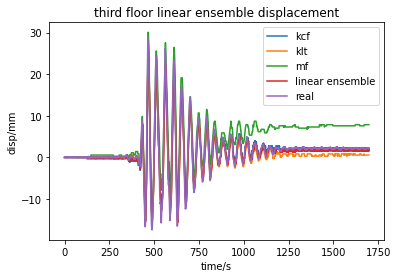

(1.7938004327900323,
 1.3393283513724452,
 0.8019019585415568,
 0.7104319929167767)

In [17]:
linear(tdf1_1, tdf2_1, tdf3_1, 0.7, 0.3)

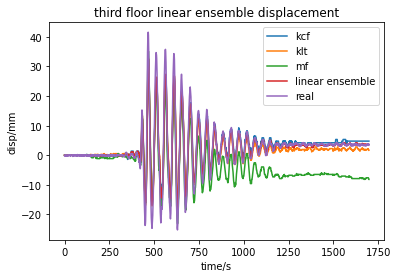

(6.4951213641989245, 2.548552798001039, 1.316781053634414, 0.6164886073498616)

In [18]:
linear(tdf1_2, tdf2_2, tdf3_2, 0.45, 0.6)

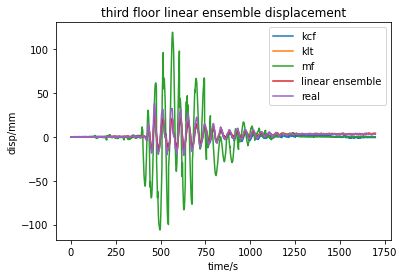

(8.713706858490397, 2.9518988564126647, 1.5248849824437323, 0.6802746792082764)

In [19]:
linear(tdf1_3, tdf2_3, tdf3_3, 0.2, 0.8)

In [22]:
def linear(df1, df2, df3, a=0.3, b=0.4):
    pred = a*df1['pred'] + b*df2['pred'] + (1-a-b)*df3['pred']
    real = df1['real']
    plt.plot(df1['pred'], label='kcf')
    plt.plot(df2['pred'], label='klt')
    plt.plot(df3['pred'], label='mf')
    plt.plot(pred, label='linear ensemble')
    plt.plot(real, label='real')
    plt.legend()
    plt.xlabel('time/s')
    plt.ylabel('disp/mm')
    plt.title('third floor linear ensemble displacement')
    plt.show()
    mse, rmse, mae, smape = loss(real, pred)
    df = pd.DataFrame([pred, real]).T
    return df

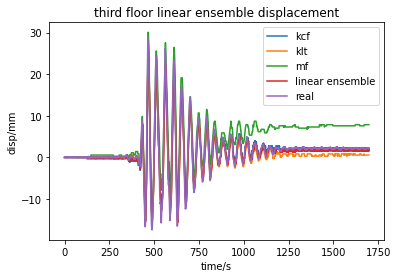

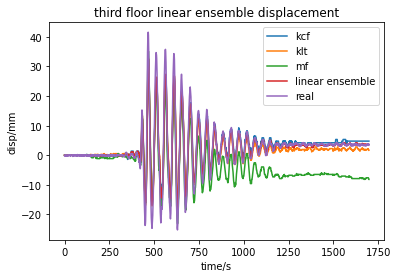

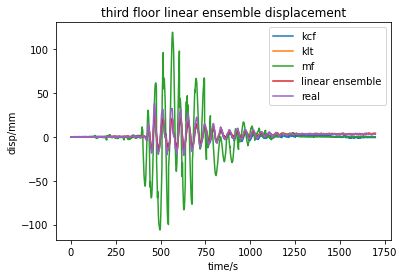

In [24]:
linear(tdf1_1, tdf2_1, tdf3_1, 0.7, 0.3).to_csv('fin_1floor.csv')
linear(tdf1_2, tdf2_2, tdf3_2, 0.45, 0.6).to_csv('fin_2floor.csv')
linear(tdf1_3, tdf2_3, tdf3_3, 0.2, 0.8).to_csv('fin_3floor.csv')